# Applying Machine Learning to Ames housing data to predict sale prices
## Shameer Sukha - Jan 2020

This notebook applies machine learning techniques to the Ames housing data to predict **sales prices** from various other variables related to a house. It is in response to the NYDSA - Machine Learning project.

It conducts a walk-through of the data science lifecycle for machine learning comprising of data cleaning, imputation, analysis, wrangling, visualisation and finally modelling.

## Import necessary packages 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import statsmodels.api as sm
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms

## Print information about data for reference

In [2]:
filename = '.\data\data_description.txt'
with open(filename) as f:
    for line in f:
        print(line)

MSSubClass: Identifies the type of dwelling involved in the sale.	



        20	1-STORY 1946 & NEWER ALL STYLES

        30	1-STORY 1945 & OLDER

        40	1-STORY W/FINISHED ATTIC ALL AGES

        45	1-1/2 STORY - UNFINISHED ALL AGES

        50	1-1/2 STORY FINISHED ALL AGES

        60	2-STORY 1946 & NEWER

        70	2-STORY 1945 & OLDER

        75	2-1/2 STORY ALL AGES

        80	SPLIT OR MULTI-LEVEL

        85	SPLIT FOYER

        90	DUPLEX - ALL STYLES AND AGES

       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

       150	1-1/2 STORY PUD - ALL AGES

       160	2-STORY PUD - 1946 & NEWER

       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

       190	2 FAMILY CONVERSION - ALL STYLES AND AGES



MSZoning: Identifies the general zoning classification of the sale.

		

       A	Agriculture

       C	Commercial

       FV	Floating Village Residential

       I	Industrial

       RH	Residential High Density

       RL	Residential Low Density

       RP	Residential 

## Load Data
1. Use downloaded train data from Kaggle, test data is not useful since it does not contain SalePrice because of competition
2. Use 70/30 split to hold-out 30% of training data but only after all data cleaning and pre-processing completed.


In [3]:
# Read .csv files
housing = pd.read_csv('./data/train.csv')
housing.shape

(1460, 81)

## Data Exploration
1. Create useful initial summary of variables, which will help with **missingness** and **feature selection**
2. Create charts and stats to summarise SalePrice target variable
3. Create charts and stats to summarise SalePrice with features expected to be important
3. Create charts and stats to understand relationships amongst all variables with themselves and avoid multicollinearity

In [4]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [5]:
# Year is an ordinal variable because inflation and age affects values so leave as numeric type. 
# However month is categorical not numerical - MoSold
# In addition MSSubClass is categorical but stored as numerical
# Convert these two variables as strings
housing['MSSubClass'] = housing['MSSubClass'].apply(str)
housing['MoSold'] = housing['MoSold'].astype(str)

In [6]:
def bespoke_pcorr(df, response, varname):
    """
    Takes a dataframe df of numerical variables and returns a dataframe of the 
    correlation of response variable with other variables in df and labels the 
    column varname.
    """
    response_corr = pd.DataFrame(df.corr(method='pearson')[response]).reset_index()
    response_corr.columns = [varname, 'PearsonCorr']
    return response_corr


def bespoke_outliers(df, factor, varname):
    """
    Takes a dataframe df of numerical variables and returns a dataframe of the 
    number of outliers past factor multiple of the inter-quartile range according to the Tukey method.
    """
    # Define helper function to count outliers in a given column col past a factor multiple of the
    # inter-quartile range
    def count_outliers(col, factor):
        try:
            #1st quartile (25%)
            Q1 = np.percentile(col, 25)
            # 3rd quartile (75%)
            Q3 = np.percentile(col, 75)
            # Interquartile range (IQR)
            IQR = Q3 - Q1
        
            # outlier step
            outlier_step = factor * IQR
        
            # Determine a list of indices of outliers for feature col
            numout = col[(col < Q1 - outlier_step) | (col > Q3 + outlier_step)].shape[0]
            return numout
        except:
            return 0

    outliers = pd.DataFrame(df.apply(lambda x: count_outliers(x, factor), axis=0)).reset_index()
    outliers.columns = [varname, 'NumOutliers']
    
    return outliers   


# Define own function to summarise data
def summarise_data(df, response):
    """
    Takes a dataframe df of numerical of numerical and categorical variables and creates a bespoke
    summary that is helpful for regression/predictive tasks. The target variable is identified with 
    response input and the rest are assumed to be features.
    
    Output shows columns as follows:
    1. Predictor variable name
    2. Count of values in feature 
    3. Count of missing values
    4. Total length of column
    5. Percentage missing in each feature
    6. Type of feature: numerical or categorical
    7. If categorical variable, then number of catgories
    8. If numerical variable, the skewness (0 being no skew of Normal dist)
    9. If numerical variable, Pearson correlation with target variable identified in response
    10. If numerical variable, Number of outliers based on Tukey's method of factor (1.5) times inter-quartile range
    """
    tempdf = pd.DataFrame(df.count()).reset_index()
    tempdf.columns = ['Predictor', 'ValueCount']
    tempdf['MissingCount'] = tempdf['Predictor'].apply(lambda x: df[x].isnull().sum())
    tempdf['TotalCount'] = tempdf['ValueCount'] + tempdf['MissingCount']
    tempdf['MissingPercent'] = tempdf['MissingCount'] / len(df)
    tempdf['VariableType'] = tempdf['Predictor'].apply(lambda x: 'categorical' if df[x].dtype=='object' else 'numerical')
    tempdf['CountCategories'] = [len(df[col].value_counts()) if df[col].dtype == 'object' else 0 for col in 
                          tempdf['Predictor'].values]
    tempdf['Skewness'] = [stats.skew(df[col]) if df[col].dtype != 'object' else 0 for col in 
                          tempdf['Predictor'].values]
    tempdf = tempdf.merge(bespoke_pcorr(df, response, 'Predictor'), how='left', on='Predictor')
    tempdf = tempdf.merge(bespoke_outliers(df, 1.5, 'Predictor'), how='left', on='Predictor')
    tempdf.reset_index(drop=True, inplace=True)
        
    return tempdf


In [7]:
# Variables with missing values ranked by percentage missing
summarydf = summarise_data(housing, 'SalePrice')
mask = summarydf.MissingPercent > 0
missing_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('MissingPercent', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,PearsonCorr,NumOutliers
72,PoolQC,7,1453,1460,0.995205,categorical,3,0.0,NaN,0
74,MiscFeature,54,1406,1460,0.963014,categorical,4,0.0,NaN,0
6,Alley,91,1369,1460,0.937671,categorical,2,0.0,NaN,0
73,Fence,281,1179,1460,0.807534,categorical,4,0.0,NaN,0
57,FireplaceQu,770,690,1460,0.472603,categorical,5,0.0,NaN,0
3,LotFrontage,1201,259,1460,0.177397,numerical,0,NaN,0.351799,30
58,GarageType,1379,81,1460,0.055479,categorical,6,0.0,NaN,0
59,GarageYrBlt,1379,81,1460,0.055479,numerical,0,NaN,0.486362,0
60,GarageFinish,1379,81,1460,0.055479,categorical,3,0.0,NaN,0
63,GarageQual,1379,81,1460,0.055479,categorical,5,0.0,NaN,0


In [8]:
summarydf

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,PearsonCorr,NumOutliers
0,Id,1460,0,1460,0.000000,numerical,0,0.000000,-0.021917,0
1,MSSubClass,1460,0,1460,0.000000,categorical,15,0.000000,NaN,0
2,MSZoning,1460,0,1460,0.000000,categorical,5,0.000000,NaN,0
3,LotFrontage,1201,259,1460,0.177397,numerical,0,NaN,0.351799,30
4,LotArea,1460,0,1460,0.000000,numerical,0,12.195142,0.263843,69
...,...,...,...,...,...,...,...,...,...,...
76,MoSold,1460,0,1460,0.000000,categorical,12,0.000000,NaN,0
77,YrSold,1460,0,1460,0.000000,numerical,0,0.096170,-0.028923,0
78,SaleType,1460,0,1460,0.000000,categorical,9,0.000000,NaN,0
79,SaleCondition,1460,0,1460,0.000000,categorical,6,0.000000,NaN,0


In [9]:
# Store lists of names of numerical and categorical features
mask = summarydf.VariableType == 'categorical'
categorical_vars = list(summarydf.loc[mask, 'Predictor'])
print('The number of categorical variables are: %.0i' %len(categorical_vars))
mask = summarydf.VariableType == 'numerical'
numerical_vars = list(summarydf.loc[mask, 'Predictor'])
print('The number of numerical variables are: %.0i' %len(numerical_vars))

The number of categorical variables are: 45
The number of numerical variables are: 36


In [10]:
# Variables with skewness greater than 0.6, ranked by skewness
mask = (np.abs(summarydf.Skewness) > 0.6) & (summarydf.VariableType == 'numerical')
skew_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('Skewness', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,PearsonCorr,NumOutliers
75,MiscVal,1460,0,1460,0.0,numerical,0,24.451640,-0.021190,52
71,PoolArea,1460,0,1460,0.0,numerical,0,14.813135,0.092404,7
4,LotArea,1460,0,1460,0.0,numerical,0,12.195142,0.263843,69
69,3SsnPorch,1460,0,1460,0.0,numerical,0,10.293752,0.044584,24
45,LowQualFinSF,1460,0,1460,0.0,numerical,0,9.002080,-0.025606,26
52,KitchenAbvGr,1460,0,1460,0.0,numerical,0,4.483784,-0.135907,68
36,BsmtFinSF2,1460,0,1460,0.0,numerical,0,4.250888,-0.011378,167
70,ScreenPorch,1460,0,1460,0.0,numerical,0,4.117977,0.111447,116
48,BsmtHalfBath,1460,0,1460,0.0,numerical,0,4.099186,-0.016844,82
68,EnclosedPorch,1460,0,1460,0.0,numerical,0,3.086696,-0.128578,208


In [11]:
# Variables that are highly correlated with SalePrice for initial indication of useful features
mask = (np.abs(summarydf.PearsonCorr) > 0.5) & (summarydf.VariableType == 'numerical')
salescorr_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('PearsonCorr', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,PearsonCorr,NumOutliers
80,SalePrice,1460,0,1460,0.0,numerical,0,1.880941,1.000000,61
17,OverallQual,1460,0,1460,0.0,numerical,0,0.216721,0.790982,2
46,GrLivArea,1460,0,1460,0.0,numerical,0,1.365156,0.708624,31
61,GarageCars,1460,0,1460,0.0,numerical,0,-0.342197,0.640409,5
62,GarageArea,1460,0,1460,0.0,numerical,0,0.179796,0.623431,21
38,TotalBsmtSF,1460,0,1460,0.0,numerical,0,1.522688,0.613581,61
43,1stFlrSF,1460,0,1460,0.0,numerical,0,1.375342,0.605852,20
49,FullBath,1460,0,1460,0.0,numerical,0,0.036524,0.560664,0
54,TotRmsAbvGrd,1460,0,1460,0.0,numerical,0,0.675646,0.533723,30
19,YearBuilt,1460,0,1460,0.0,numerical,0,-0.612831,0.522897,7


In [12]:
# Variables with large number of outliers ranked by count of possible outliers
mask = (np.abs(summarydf.NumOutliers) !=0) & (summarydf.VariableType == 'numerical')
outlier_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('NumOutliers', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,PearsonCorr,NumOutliers
68,EnclosedPorch,1460,0,1460,0.000000,numerical,0,3.086696,-0.128578,208
36,BsmtFinSF2,1460,0,1460,0.000000,numerical,0,4.250888,-0.011378,167
18,OverallCond,1460,0,1460,0.000000,numerical,0,0.692355,-0.077856,125
70,ScreenPorch,1460,0,1460,0.000000,numerical,0,4.117977,0.111447,116
26,MasVnrArea,1452,8,1460,0.005479,numerical,0,NaN,0.477493,96
48,BsmtHalfBath,1460,0,1460,0.000000,numerical,0,4.099186,-0.016844,82
67,OpenPorchSF,1460,0,1460,0.000000,numerical,0,2.361912,0.315856,77
4,LotArea,1460,0,1460,0.000000,numerical,0,12.195142,0.263843,69
52,KitchenAbvGr,1460,0,1460,0.000000,numerical,0,4.483784,-0.135907,68
80,SalePrice,1460,0,1460,0.000000,numerical,0,1.880941,1.000000,61


In [13]:
def chart_singlevar_dist(df, response):
    """
    Takes a dataframe df with identified target variable in response  and plots histogram, box plot and qq-plot. 
    This will help to quickly identify normality.
    """
    fig, ax = plt.subplots(figsize=(14, 12), ncols=2, nrows=3, sharex=False, sharey=False)
    
    sns.distplot(df[response], norm_hist=True, ax=ax[0,0])
    sns.boxplot(df[response], ax=ax[1,0])
    stats.probplot(df[response], plot=ax[2,0])
    ax[2,0].set(title='')   
    
    sns.distplot(np.log1p(df[response]), norm_hist=True, ax=ax[0,1])
    ax[0,1].set(xlabel = 'log 1+'+response)
    sns.boxplot(np.log1p(df[response]), ax=ax[1,1])
    ax[1,1].set(xlabel = 'log 1+'+response)
    stats.probplot(np.log1p(df[response]), plot=ax[2,1])
    ax[2,1].set(xlabel = 'log 1+'+response, title='')
    
    return fig.show()

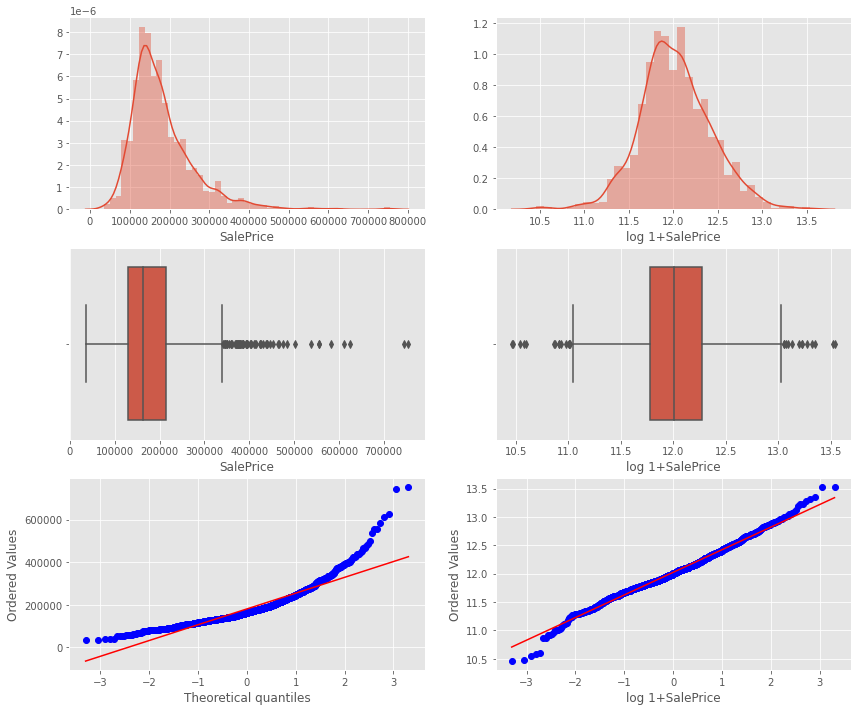

In [14]:
chart_singlevar_dist(housing, 'SalePrice')

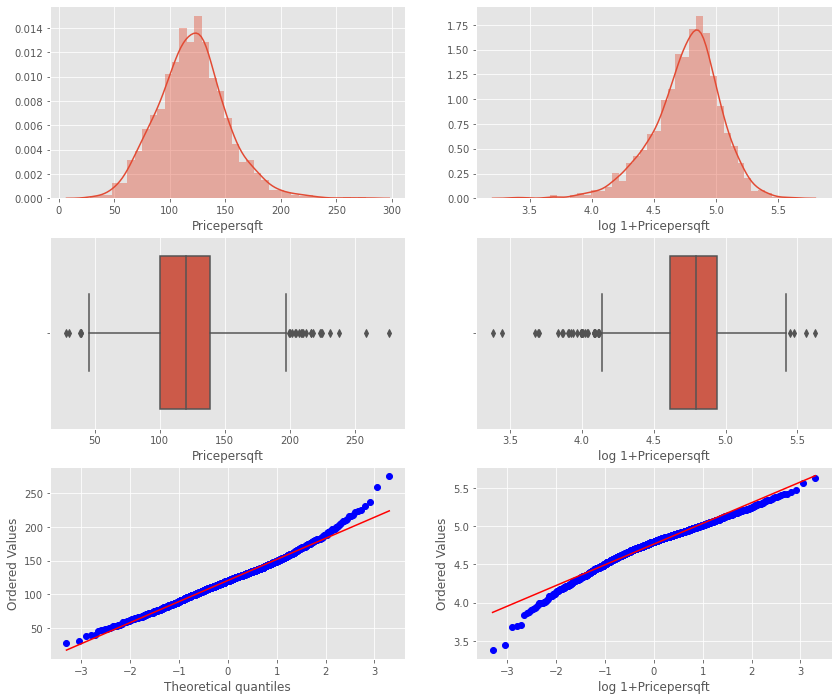

In [15]:
# Create SalePrice per square foot variable and check distribution (no data missing so all good)
housing['Pricepersqft'] = (housing['SalePrice'] / housing['GrLivArea'])
chart_singlevar_dist(housing, 'Pricepersqft')

In [16]:
# No need to use log SalePrice since Pricepersqft variable has much better properties than SalePrice itself.
# Set Pricepersqft as target variable
target = housing.Pricepersqft

In [17]:
# Variables that are highly correlated with SalePrice for initial indication of useful features
summarydf = summarise_data(housing, 'Pricepersqft')
mask = (np.abs(summarydf.PearsonCorr) > 0.3) & (summarydf.VariableType == 'numerical')
salescorr_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('PearsonCorr', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,PearsonCorr,NumOutliers
81,Pricepersqft,1460,0,1460,0.000000,numerical,0,0.375531,1.000000,25
80,SalePrice,1460,0,1460,0.000000,numerical,0,1.880941,0.575505,61
19,YearBuilt,1460,0,1460,0.000000,numerical,0,-0.612831,0.554921,7
17,OverallQual,1460,0,1460,0.000000,numerical,0,0.216721,0.473772,2
59,GarageYrBlt,1379,81,1460,0.055479,numerical,0,NaN,0.469581,0
20,YearRemodAdd,1460,0,1460,0.000000,numerical,0,-0.503044,0.448556,0
38,TotalBsmtSF,1460,0,1460,0.000000,numerical,0,1.522688,0.418392,61
61,GarageCars,1460,0,1460,0.000000,numerical,0,-0.342197,0.401951,5
62,GarageArea,1460,0,1460,0.000000,numerical,0,0.179796,0.394410,21
34,BsmtFinSF1,1460,0,1460,0.000000,numerical,0,1.683771,0.392853,7


In [18]:
def corr_plot(df, varlist):
    """
    Takes a dataframe df and plots a correlation chart of all combinations of variables identified
    in varlist list of variable names.
    """
    train_corr = df[varlist].corr(method='pearson')
    fig, ax = plt.subplots(figsize=(10, 8))
    # mask
    mask = np.triu(np.ones_like(train_corr, dtype=np.bool))
    # adjust mask and df
    corr = train_corr.iloc[1:,:-1].copy()
    # plot heatmap
    sns.heatmap(train_corr, mask=mask, annot=False, fmt=".2f", cmap='Blues',
                vmin=-1, vmax=1, cbar_kws={"shrink": .8})
    # yticks
    plt.yticks(rotation=0)
    return plt.show()

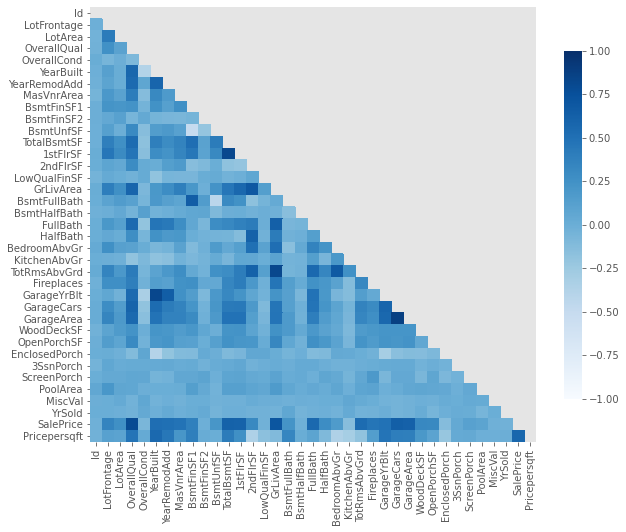

In [19]:
# Correlation plot of all variables
corr_plot(housing, list(housing.columns))

In [20]:
# Correlation plot of predictor variables with abs(corr) > 0.7 to detect multicollinearity
corr_matrix = housing.drop(['Id','Pricepersqft','SalePrice'], axis=1).corr(method='pearson').corr().abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
sol = pd.DataFrame(sol).reset_index()
sol.columns = ['var1','var2','cor']
print(sol.loc[sol.cor > 0.7,:])
mcvar = list(sol.loc[sol.cor > 0.7,:].drop('cor', axis=1).melt().value.unique())

            var1           var2       cor
0     GarageCars     GarageArea  0.986339
1      YearBuilt    GarageYrBlt  0.973122
2    TotalBsmtSF       1stFlrSF  0.960325
3      GrLivArea   TotRmsAbvGrd  0.942088
4   YearRemodAdd    GarageYrBlt  0.900875
5    OverallQual     GarageCars  0.892770
6     BsmtFinSF1   BsmtFullBath  0.876515
7      YearBuilt   YearRemodAdd  0.874573
8    OverallQual     GarageArea  0.867500
9    GarageYrBlt     GarageCars  0.850242
10  BedroomAbvGr   TotRmsAbvGrd  0.844658
11     YearBuilt     GarageCars  0.837035
12   OverallQual      YearBuilt  0.834579
13   OverallQual    GarageYrBlt  0.829023
14   OverallQual       FullBath  0.823684
15   OverallQual   YearRemodAdd  0.821662
16     GrLivArea       FullBath  0.820026
17   GarageYrBlt     GarageArea  0.817914
18      2ndFlrSF       HalfBath  0.812515
19     YearBuilt     GarageArea  0.807326
20      2ndFlrSF   TotRmsAbvGrd  0.768053
21      FullBath     GarageCars  0.759251
22      FullBath   TotRmsAbvGrd  0

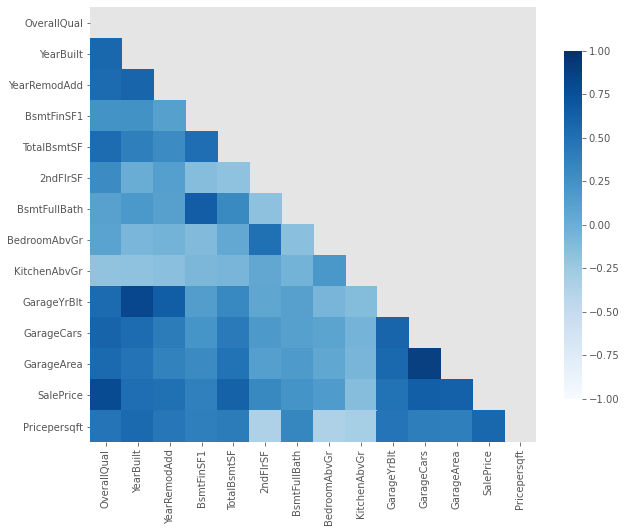

In [21]:
# Correlation plot of variables with >0.6 correlation with SalePrice to identify features that are useful
corr_plot(housing, salescorr_vars)

## Data Exploration Insights
1. There are 79 features with a sample of 1460 homes that we can use to try model SalePrice of homes in Ames. 
2. Initially, the features consist of 34 numerical and 45 categorical variables and has lots of missing data as well as apparent outliers.
3. There are a few skewed distributions of features, which would require some sort of transformation if using linear models to predict SalePrice.
4. The distribution of SalePrice itself, is skewed-right and 'Sale Price per square foot' makes the data look decently normal, which is encouraging if we want to apply the class of linear models.
5. Important predictors of Pricepersqft are: OverallQual, YearBuilt, variables related to size, variables related to Garage.
6. Initial assessments of Pearson correlation coefficients indicate there is duplicate information within features like: GarageCars/GarageArea, YrBuilt/GarageYrBlt, TotalBsmtSF/1stFlrSF, GrLivArea/TotRmsAbvGrd.
7. Before conducting feature engineering, we will pre-process data for missingness and duplication

## Dealing with missingness
1. Most data are not missing at random, they represent the lack of feature i.e don't have a pool or fireplace

In [22]:
# Straightforward Not Missing At Random (NMAR) in that missing means not available or present, set those to N
setnolist = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish',\
             'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2','BsmtFinType1', 'BsmtCond',\
             'BsmtQual']
housing[setnolist] = housing[setnolist].fillna('N')

In [23]:
# Straightforward NMAR in that missing means not available or present, set those to None
housing['MasVnrType'] = housing['MasVnrType'].fillna('None')

In [24]:
# These variables are not straightforward to complete missingness

# Electrical
housing['Electrical'].value_counts()
# The category Mix represents a mixed electrical system and there is only one house with this system. Use this for the single missing value
# since it won't make a material difference.
housing['Electrical'] = housing['Electrical'].fillna('Mix')

# MasVnrArea
msonlist = ['MasVnrArea', 'MasVnrType']
housing.loc[housing['MasVnrArea'].isnull(), msonlist]
# It turns out that all of the houses with missing MasVnrArea don't have a Masonry Veneer. So can set to 0
housing['MasVnrArea'].fillna(0,inplace=True)

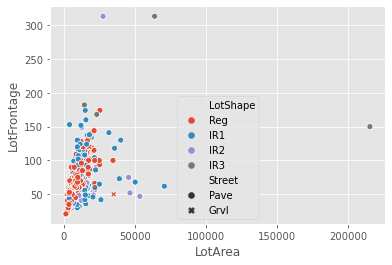

In [25]:
#LotFrontage
lotlist = ['LotFrontage', 'LotArea', 'LotShape', 'Street']
housing.loc[housing['LotFrontage'].isnull(), lotlist]

# See relationship between LotFront and Lot Area
normlot=housing[lotlist]
#normlot = housing[lotlist].dropna()
#normlot = normlot.loc[normlot[['LotFrontage', 'LotArea']].apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
sns.scatterplot(data=normlot, x='LotArea', y='LotFrontage', hue='LotShape', style='Street')

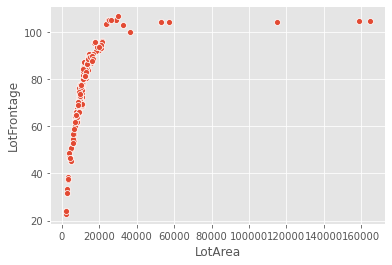

In [26]:
# LotFrontage appears to be Missing at Random (MAR) so use kNN imputation
# Sqrt(1200) is about 35, so use that for K, which will also be robust to outliers (which is present)
imputer = KNNImputer(n_neighbors=35)
lotlist = ['LotFrontage', 'LotArea']
imputedvals = pd.DataFrame(imputer.fit_transform(housing[lotlist]), columns=lotlist)
sns.scatterplot(data=imputedvals.loc[housing['LotFrontage'].isnull(), lotlist], x='LotArea', y='LotFrontage')
# Most of the data imputation <50000 LotArea makese sense but there are a few outliers for larger LotArea. This is fine for now
# because we will deal with outliers later.
housing['LotFrontage'] = imputedvals['LotFrontage']

In [27]:
garagelist = ['GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual']
print(housing.loc[housing['GarageYrBlt'].isnull(), garagelist]['GarageType'].shape)
print(housing.loc[housing['GarageYrBlt'].isnull(), garagelist]['GarageType'].value_counts())
# Easy one to solve, GarageYrBlt is not missing at random, it is because there is no Garage. Impute with zeros
housing['GarageYrBlt'].fillna(0,inplace=True)

(81,)
N    81
Name: GarageType, dtype: int64


In [28]:
# Check for missing values in total dataset again
housing.isna().sum().sum()

0

Excellent! we have dealt with all missing values.

## Before any feature selecting try Lasso regression to see what results can be obtained

In [29]:
# Define function to run Lasso to check scores
def run_lasso(housing):
    # Re-run summary for categorical vs numerical features
    summarydf = summarise_data(housing, 'SalePrice')
    mask = summarydf.VariableType == 'categorical'
    categorical_vars = list(summarydf.loc[mask, 'Predictor'])
    mask = summarydf.VariableType == 'numerical'
    numerical_vars = list(summarydf.loc[mask, 'Predictor'])
    # Redo target variable in case data points/outliers were dropped
    target = housing.Pricepersqft
    # Remove predictor and unnecessary variables
    numerical_vars.remove('SalePrice')
    numerical_vars.remove('Id')
    features = housing.drop(['Id', 'SalePrice','Pricepersqft'], axis=1)
    # Use one-hot encoding of categorical variables
    onehothousing = pd.get_dummies(features, columns=categorical_vars, prefix=categorical_vars, drop_first=True)
        
    # Train Test split
    X_train, X_test, y_train, y_test = train_test_split(onehothousing, target, test_size=0.3, random_state=28)
    
    # Lasso model using 10fold CV and grid search
    lasso = Lasso()
    lasso.set_params(normalize=False)
    grid_para_lasso = {'alpha': np.arange(0,1,0.05)}
    grid_search_lasso = ms.GridSearchCV(lasso, grid_para_lasso, cv=10, scoring='r2').fit(X_train, y_train)
    print('The best score is %.4f' %grid_search_lasso.best_score_)
    print('The training error is %.4f' %(1 - grid_search_lasso.best_estimator_.score(X_train, y_train)))
    print('The testing error is %.4f' %(1 - grid_search_lasso.best_estimator_.score(X_test, y_test)))

In [30]:
# Check scores before feature engineering
run_lasso(housing)

The best score is 0.8008
The training error is 0.1429
The testing error is 0.2866


## Feature Engineering
1. Check features identified to have outliers and remove obvious ones
2. Consider transformations when it appears that feature is skewed or has many outliers

In [31]:
# Variables with Outliers ranked by number of identified
summarydf = summarise_data(housing, 'Pricepersqft')
mask = (np.abs(summarydf.NumOutliers) !=0) & (summarydf.VariableType == 'numerical')
outlier_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('NumOutliers', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,PearsonCorr,NumOutliers
68,EnclosedPorch,1460,0,1460,0.0,numerical,0,3.086696,-0.216942,208
36,BsmtFinSF2,1460,0,1460,0.0,numerical,0,4.250888,0.016556,167
18,OverallCond,1460,0,1460,0.0,numerical,0,0.692355,0.031852,125
70,ScreenPorch,1460,0,1460,0.0,numerical,0,4.117977,0.042951,116
26,MasVnrArea,1460,0,1460,0.0,numerical,0,2.674865,0.209652,98
3,LotFrontage,1460,0,1460,0.0,numerical,0,1.942872,0.094614,87
48,BsmtHalfBath,1460,0,1460,0.0,numerical,0,4.099186,0.010476,82
59,GarageYrBlt,1460,0,1460,0.0,numerical,0,-3.865524,0.229679,81
67,OpenPorchSF,1460,0,1460,0.0,numerical,0,2.361912,0.100935,77
4,LotArea,1460,0,1460,0.0,numerical,0,12.195142,0.096957,69


### Explore porch-related variables

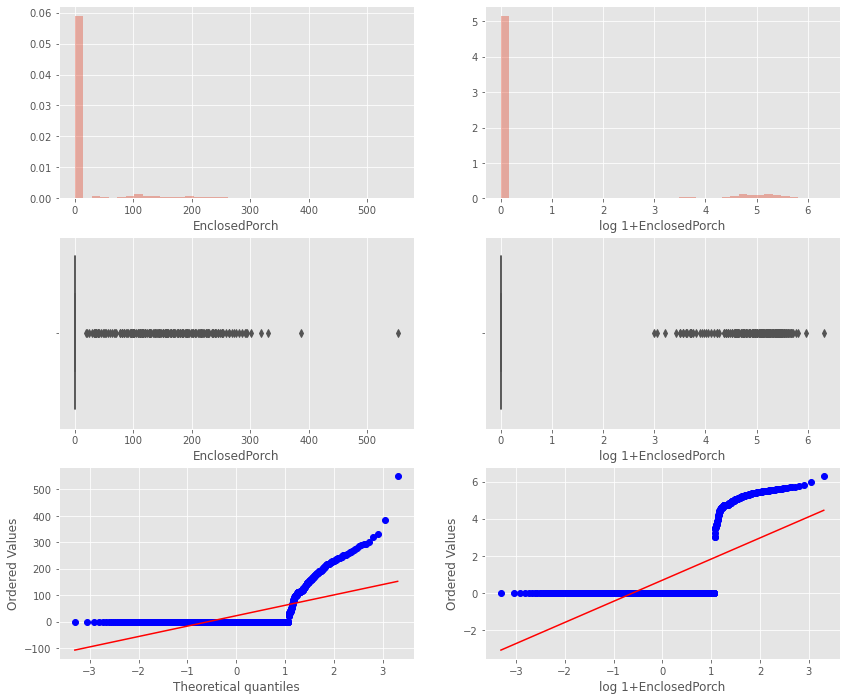

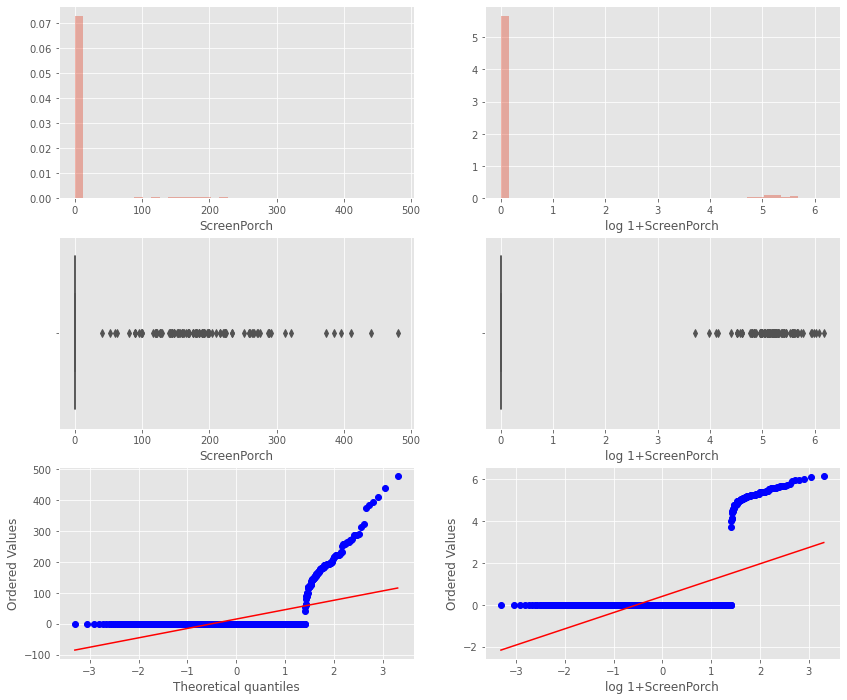

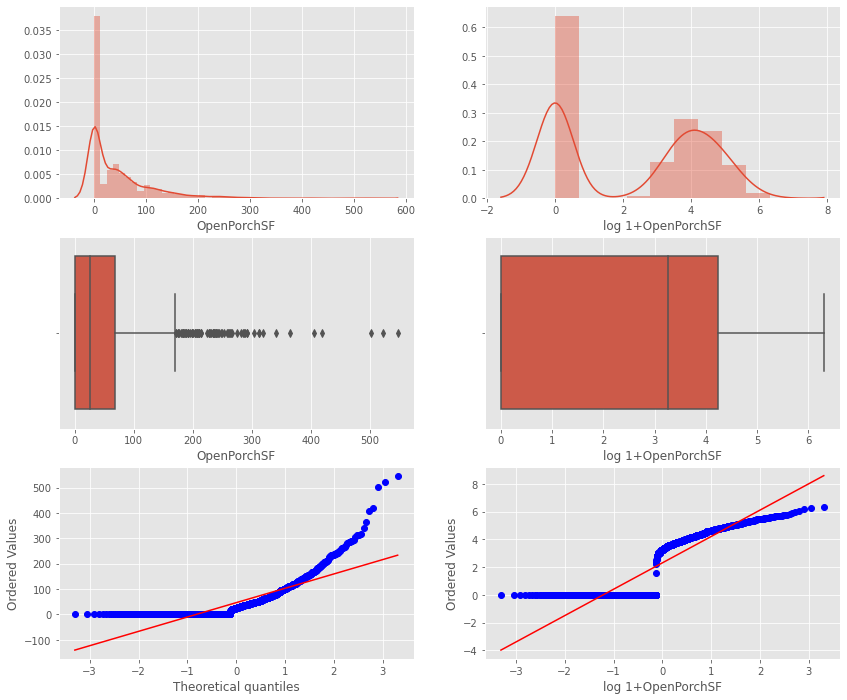

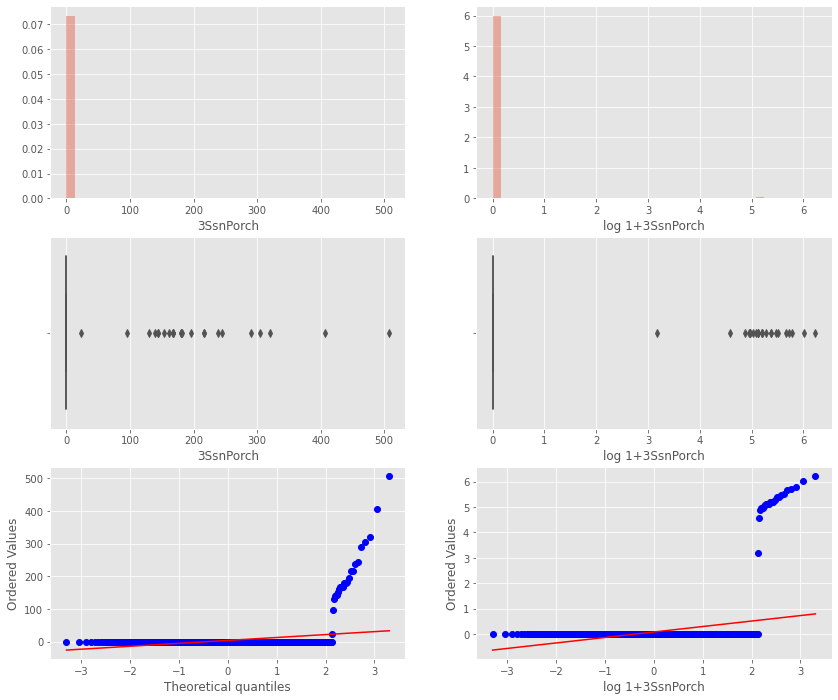

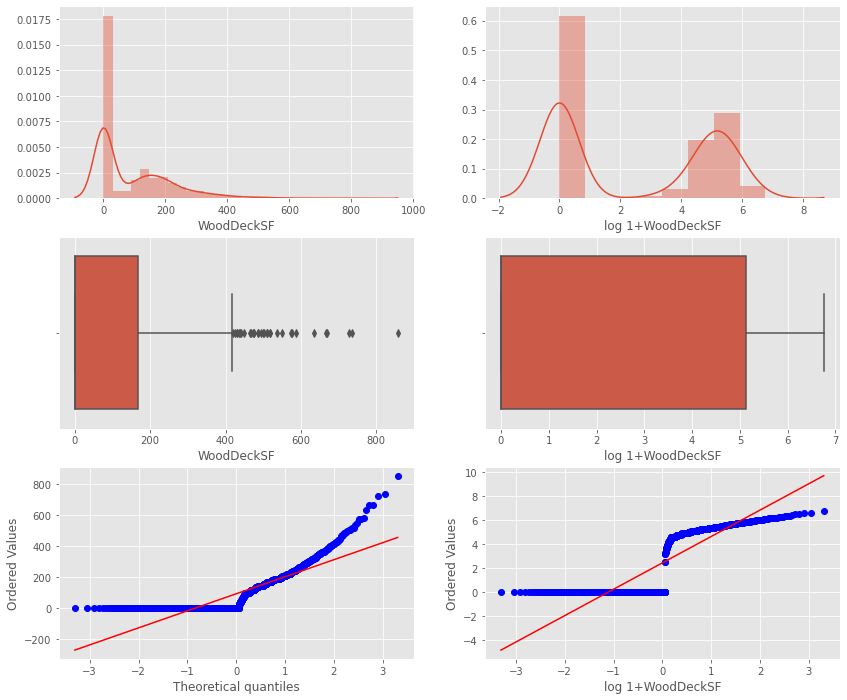

In [32]:
chart_singlevar_dist(housing, 'EnclosedPorch')
chart_singlevar_dist(housing, 'ScreenPorch')
chart_singlevar_dist(housing, 'OpenPorchSF')
chart_singlevar_dist(housing, '3SsnPorch')
chart_singlevar_dist(housing, 'WoodDeckSF')
# All of these variables are imbalanced due to many zeros which represent lack of feature. Consider making these categorical variables

In [33]:
def priceplots(var, bins):
    """
    Scatterplot of relevant porch variable against SalePrice with and without bins. Only filters for non-zero
    values of porch variable and shows 2 charts, one without bins and one with bins. This helps to identify
    cut-off values of porch variable to convert numeric feature into categorical feature
    """
    fig, ax = plt.subplots(figsize=(12, 4), ncols=2, sharex=False, sharey=True)
    sns.regplot(data=housing[(housing[var]!=0)], x=var, y='Pricepersqft', ax=ax[0])
    sns.regplot(data=housing[(housing[var]!=0)], x=var, y='Pricepersqft', x_bins=bins, ax=ax[1])
    ax[0].set(xlabel = var + ' (non-zero values)', title='No Bins')
    ax[1].set(xlabel = var + ' (non-zero values)', title='With Bins')

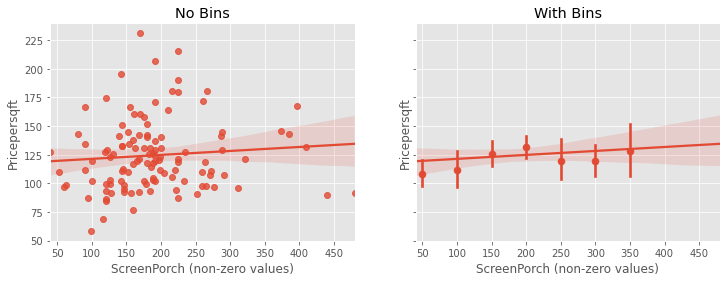

In [34]:
# Plot screenporch scatter charts    
priceplots('ScreenPorch',[50,100,150,200,250,300,350])
# It appears that 125,225 are good cut-off values

In [35]:
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 0:
        return 'N'
    elif val > 0 and val <= 125:
        return '0to125'
    elif val > 125 and val <= 225:
        return '125to225'
    elif val > 225:
        return '225plus'
housing['ScreenPorch'] = housing['ScreenPorch'].apply(categorize)
housing['ScreenPorch'].value_counts()

N           1344
125to225      72
225plus       24
0to125        20
Name: ScreenPorch, dtype: int64

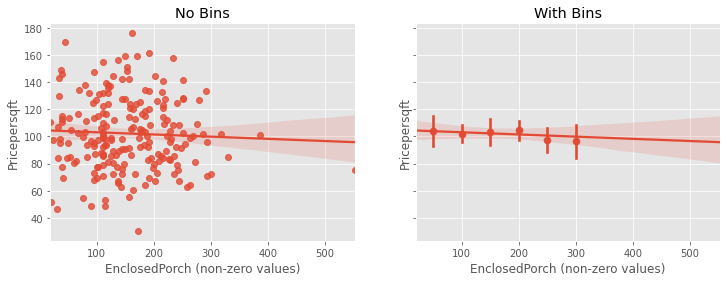

In [36]:
# Plot EnclosedPorch scatter charts    
priceplots('EnclosedPorch',[50,100,150,200,250,300])
# It appears that 200 is a good cut-off value

In [37]:
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 0:
        return 'N'
    elif val > 0 and val <= 200:
        return '0to200'
    elif val > 200:
        return '200plus'
housing['EnclosedPorch'] = housing['EnclosedPorch'].apply(categorize)

In [38]:
housing['EnclosedPorch'].value_counts()

N          1252
0to200      153
200plus      55
Name: EnclosedPorch, dtype: int64

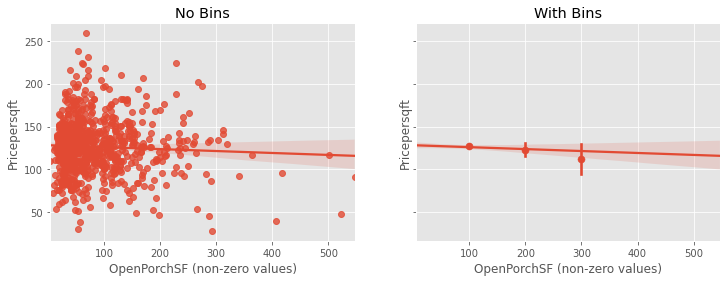

In [39]:
# Plot OpenPorchSF scatter charts    
priceplots('OpenPorchSF',[100,200,300])
# It appears that 300 is a good cut-off value

In [40]:
# Keep OpenPorchSF as is, converting to categorical adds another dimension without much benefit

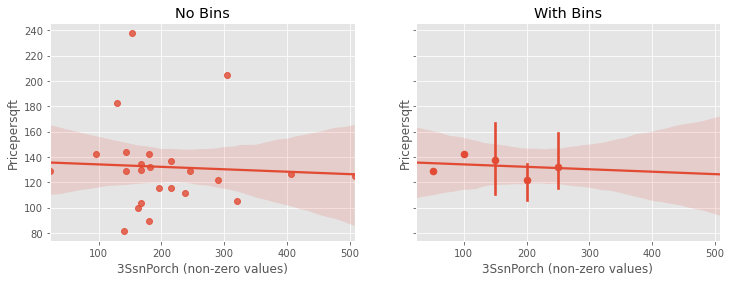

In [41]:
# Plot 3SsnPorch scatter charts    
priceplots('3SsnPorch',[50,100,150,200,250])
# No need for cut-off value
# R2 is 0.015 and after dummification, it's 0.018. No value to keeping this sparse variable so drop it
housing.drop('3SsnPorch', axis=1, inplace=True)

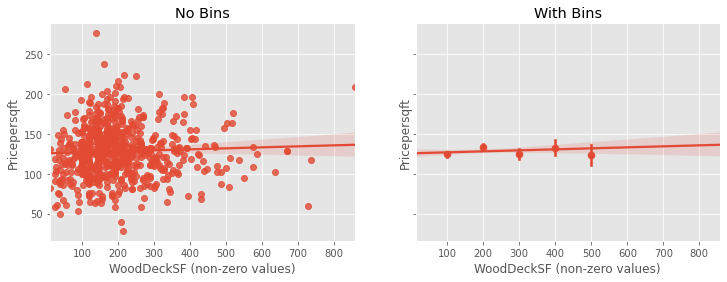

In [42]:
# Plot WoodDeckSF scatter charts    
priceplots('WoodDeckSF',[100,200,300,400,500])
# It appears that no cut-off value is required.
# R2 is 0.387 and after dummification it's 0.506. Hence dummification increases explain without introducing
# and additional dimension.

In [43]:
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 0:
        return 'N'
    else:
        return 'Y'
housing['WoodDeckSF'] = housing['WoodDeckSF'].apply(categorize)
housing['WoodDeckSF'].value_counts()

N    761
Y    699
Name: WoodDeckSF, dtype: int64

In [44]:
# Variables with Outliers ranked by number of identified
summarydf = summarise_data(housing, 'Pricepersqft')
mask = (np.abs(summarydf.NumOutliers) !=0) & (summarydf.VariableType == 'numerical')
outlier_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('Skewness', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,PearsonCorr,NumOutliers
74,MiscVal,1460,0,1460,0.0,numerical,0,24.451640,-0.012039,52
70,PoolArea,1460,0,1460,0.0,numerical,0,14.813135,-0.013320,7
4,LotArea,1460,0,1460,0.0,numerical,0,12.195142,0.096957,69
45,LowQualFinSF,1460,0,1460,0.0,numerical,0,9.002080,-0.159051,26
52,KitchenAbvGr,1460,0,1460,0.0,numerical,0,4.483784,-0.301895,68
36,BsmtFinSF2,1460,0,1460,0.0,numerical,0,4.250888,0.016556,167
48,BsmtHalfBath,1460,0,1460,0.0,numerical,0,4.099186,0.010476,82
26,MasVnrArea,1460,0,1460,0.0,numerical,0,2.674865,0.209652,98
67,OpenPorchSF,1460,0,1460,0.0,numerical,0,2.361912,0.100935,77
3,LotFrontage,1460,0,1460,0.0,numerical,0,1.942872,0.094614,87


### Explore Misc. variables

In [45]:
housing.MiscFeature.value_counts()

N       1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [46]:
housing[housing.MiscFeature == 'TenC']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Pricepersqft
1386,1387,60,RL,80.0,16692,Pave,N,IR1,Lvl,AllPub,...,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000,89.798851


In [47]:
housing[housing.MiscFeature == 'Shed']['MiscVal'].describe()

count      49.000000
mean      697.836735
std       512.853266
min         0.000000
25%       400.000000
50%       500.000000
75%       700.000000
max      2500.000000
Name: MiscVal, dtype: float64

In [48]:
# Remove data points for Tennis Court, Garage2, and Other 2 since not enough data to make any meaningful conclusions
# Dummify variable to indicate shed or no shed
# Drop MiscVal variable since not really interested in value of shed
dropindex = housing[(housing.MiscFeature == 'TenC') | (housing.MiscFeature == 'Othr') | (housing.MiscFeature == 'Gar2')].index
housing.drop(dropindex, axis=0, inplace=True)

In [49]:
housing['Shed'] = housing.MiscFeature

In [50]:
housing['Shed'].value_counts()

N       1406
Shed      49
Name: Shed, dtype: int64

In [51]:
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Shed':
        return 'Y'
    else: return 'N'
housing['Shed'] = housing['Shed'].apply(categorize)
housing['Shed'].value_counts()

N    1406
Y      49
Name: Shed, dtype: int64

In [52]:
# Drop MiscVal feature
housing.drop('MiscVal',axis=1, inplace=True)

In [53]:
housing.drop('MiscFeature',axis=1, inplace=True)

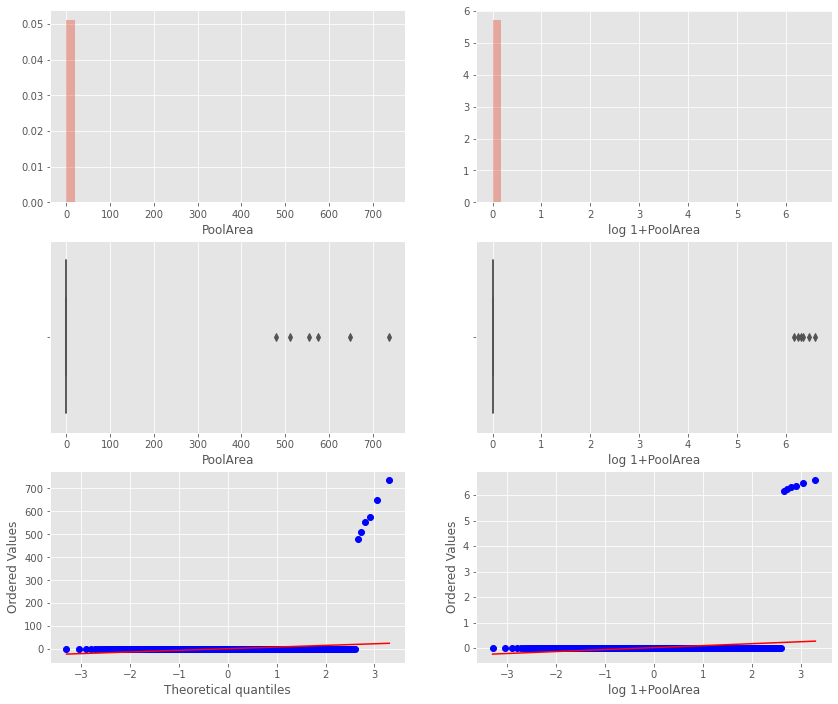

In [54]:
# Pool Area
chart_singlevar_dist(housing, 'PoolArea')

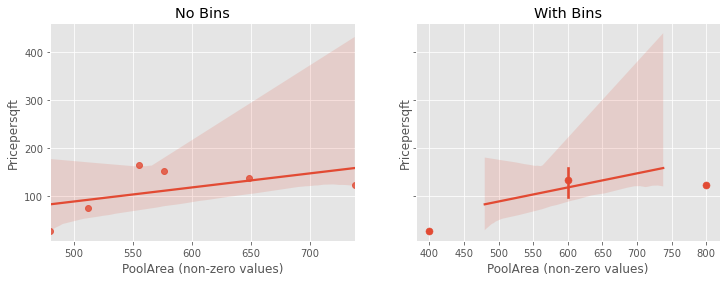

In [55]:
# Plot PoolArea scatter charts    
priceplots('PoolArea',[200,400,600,800])
# Only 6 datapoints out of >1400 so drop Pool variables since may not be able to make meaningful predictions

In [56]:
# Drop Pool feature
housing.drop('PoolArea',axis=1, inplace=True)
housing.drop('PoolQC',axis=1, inplace=True)

In [57]:
housing[housing.LotArea > 50000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,EnclosedPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Pricepersqft,Shed
53,54,20,RL,68.000000,50271,Pave,N,IR1,Low,AllPub,...,N,N,N,11,2006,WD,Normal,385000,209.011944,N
249,250,50,RL,104.628571,159000,Pave,N,IR2,Low,AllPub,...,N,N,N,6,2007,WD,Normal,277000,129.197761,Y
313,314,20,RL,150.000000,215245,Pave,N,IR3,Low,AllPub,...,N,N,N,6,2009,WD,Normal,375000,184.184676,N
335,336,190,RL,104.628571,164660,Grvl,N,IR1,HLS,AllPub,...,N,N,N,8,2008,WD,Normal,228950,128.191489,Y
384,385,60,RL,104.342857,53107,Pave,N,IR2,Low,AllPub,...,N,N,N,6,2007,WD,Normal,240000,122.887865,N
451,452,20,RL,62.000000,70761,Pave,N,IR1,Low,AllPub,...,N,N,N,12,2006,WD,Normal,280000,182.648402,N
457,458,20,RL,104.342857,53227,Pave,N,IR1,Low,AllPub,...,N,N,N,3,2008,WD,Normal,256000,153.938665,N
706,707,20,RL,104.342857,115149,Pave,N,IR2,Low,AllPub,...,N,N,N,6,2007,WD,Normal,302000,165.570175,N
769,770,60,RL,47.000000,53504,Pave,N,IR2,HLS,AllPub,...,N,125to225,N,6,2010,WD,Normal,538000,164.074413,N
1298,1299,60,RL,313.000000,63887,Pave,N,IR3,Bnk,AllPub,...,N,N,N,1,2008,New,Partial,160000,28.358738,N


In [58]:
# Drop values >50,000 since those lot areas would probably make property a special case and only 11 records
dropindex = housing[housing.LotArea > 50000].index
housing.drop(dropindex, axis=0, inplace=True)

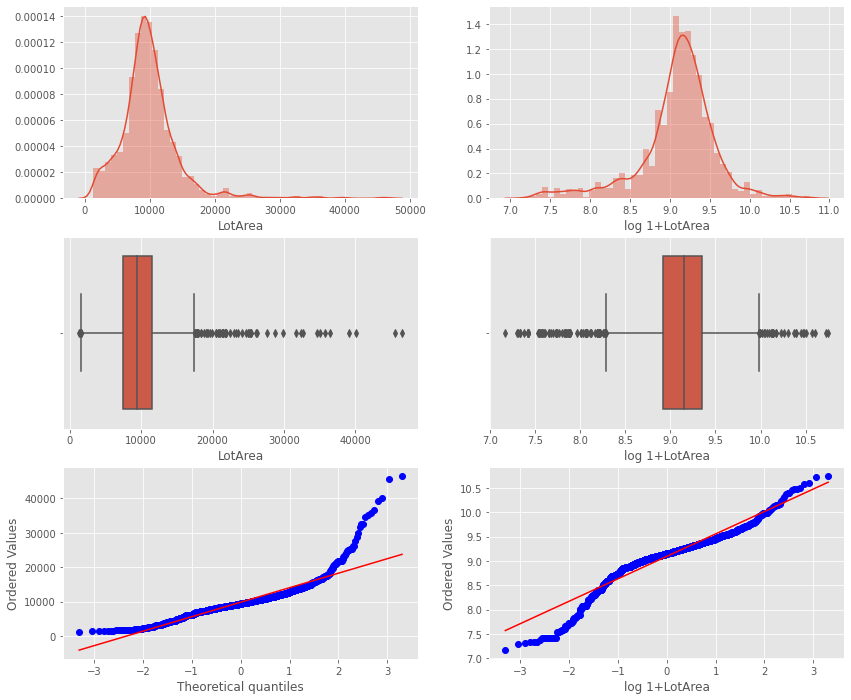

In [59]:
# Lot Area
chart_singlevar_dist(housing, 'LotArea')

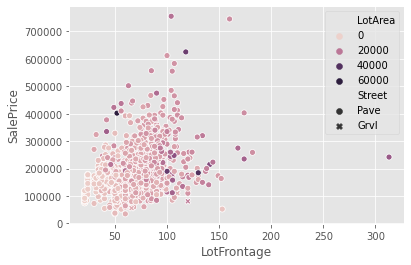

In [60]:
sns.scatterplot(data=housing, x='LotFrontage', y='SalePrice', hue='LotArea', style='Street')

In [61]:
housing[housing.LotFrontage > 150]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,EnclosedPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Pricepersqft,Shed
197,198,75,RL,174.0,25419,Pave,N,Reg,Lvl,AllPub,...,200plus,N,GdPrv,3,2006,WD,Abnorml,235000,75.514139,N
231,232,60,RL,174.0,15138,Pave,N,IR1,Lvl,AllPub,...,200plus,N,N,7,2009,WD,Normal,403000,144.237652,N
934,935,20,RL,313.0,27650,Pave,N,IR2,HLS,AllPub,...,N,N,N,11,2008,WD,Normal,242000,116.964717,N
1107,1108,60,RL,168.0,23257,Pave,N,IR3,HLS,AllPub,...,N,N,N,9,2006,New,Partial,274725,135.935181,N
1127,1128,20,RL,182.0,14572,Pave,N,IR3,Lvl,AllPub,...,N,N,N,11,2007,WD,Family,259000,169.281046,N
1182,1183,60,RL,160.0,15623,Pave,N,IR1,Lvl,AllPub,...,N,N,MnPrv,7,2007,WD,Abnorml,745000,166.443253,N
1211,1212,50,RL,152.0,12134,Pave,N,IR1,Bnk,AllPub,...,N,N,N,6,2010,WD,Normal,164000,93.607306,N
1337,1338,30,RM,153.0,4118,Pave,Grvl,IR1,Bnk,AllPub,...,N,N,N,3,2006,WD,Normal,52500,75.757576,N


In [62]:
# Drop values >150 since only 8 records and seems to be special cases
dropindex = housing[housing.LotFrontage > 150].index
housing.drop(dropindex, axis=0, inplace=True)

In [63]:
# Make LotShape binary Regular or Irregular
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Reg':
        return 'Reg'
    else: return 'Irreg'
housing['LotShape'] = housing['LotShape'].apply(categorize)
housing['LotShape'].value_counts()

Reg      922
Irreg    514
Name: LotShape, dtype: int64

In [64]:
housing.Street.value_counts()

Pave    1431
Grvl       5
Name: Street, dtype: int64

In [65]:
# Drop street feature since only 5 values with gravel and not important feature from initial indications
housing.drop('Street', axis=1, inplace=True)

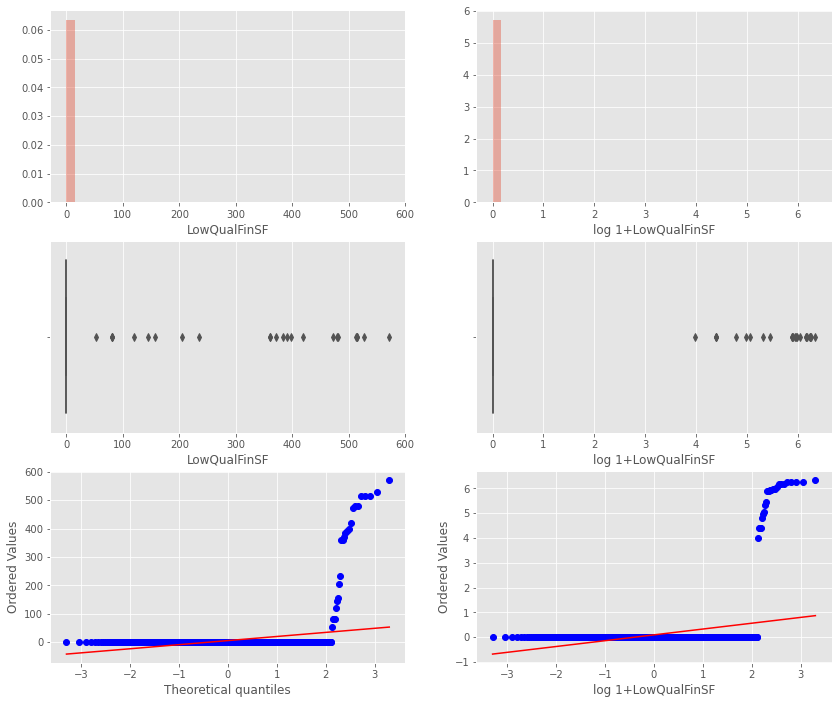

In [66]:
# LowQualFinSF
chart_singlevar_dist(housing, 'LowQualFinSF')

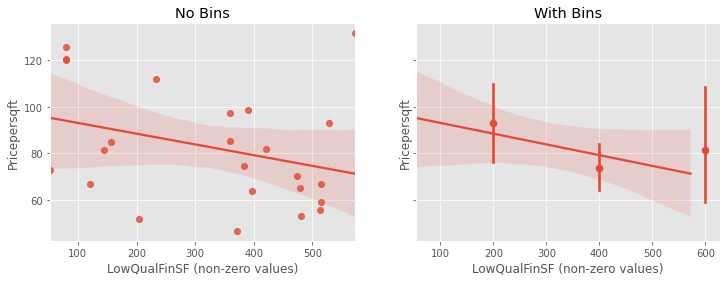

In [67]:
# Plot LowQualFinSF scatter charts    
priceplots('LowQualFinSF',[200,400,600,800])
# Only 24 datapoints so very sparse variable, information likely to be captured in OverallQuality - so drop feature

In [68]:
# Only 24 datapoints so very sparse variable, information likely to be captured in OverallQuality - so drop feature
# since sparsity doesn't help create any meaningful information
housing.drop('LowQualFinSF', axis=1, inplace=True)

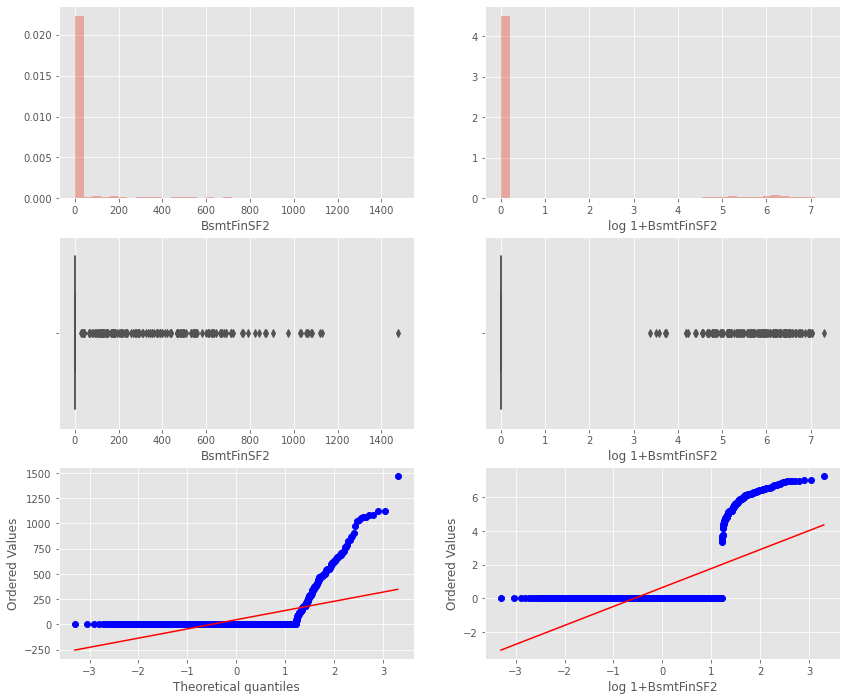

In [69]:
chart_singlevar_dist(housing, 'BsmtFinSF2')

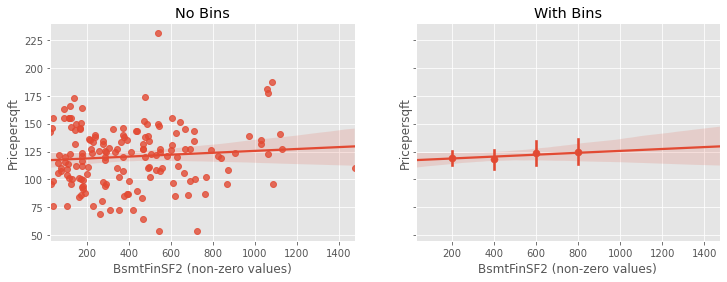

In [70]:
# Plot LowQualFinSF scatter charts    
priceplots('BsmtFinSF2',[200,400,600,800])
# Not really contributing so consider combining with other Basement features

In [71]:
basevar = ['TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']
housing[basevar]

,TotalBsmtSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
0,856,706,0,150
1,1262,978,0,284
2,920,486,0,434
3,756,216,0,540
4,1145,655,0,490
...,...,...,...,...
1455,953,0,0,953
1456,1542,790,163,589
1457,1152,275,0,877
1458,1078,49,1029,0


In [72]:
# Drop BsmtFinSF1 and 2 since duplicate information leading to multicollinearity. Also drop FinType1 and FinType2
# More important to distinguish between Total basement size and how much is unfinished.
housing.drop('BsmtFinSF1', axis=1, inplace=True)
housing.drop('BsmtFinSF2', axis=1, inplace=True)
housing.drop('BsmtFinType1', axis=1, inplace=True)
housing.drop('BsmtFinType2', axis=1, inplace=True)

In [73]:
basevar = ['BsmtQual', 'BsmtCond', 'BsmtExposure']
for var in basevar:
    print(housing[var].value_counts())

TA    643
Gd    605
Ex    117
N      36
Fa     35
Name: BsmtQual, dtype: int64
TA    1289
Gd      64
Fa      45
N       36
Po       2
Name: BsmtCond, dtype: int64
No    946
Av    216
Gd    124
Mn    113
N      37
Name: BsmtExposure, dtype: int64


In [74]:
# Data error with BsmtExposure since have 37 with no basement vs 36 from other 2 variables
basevar = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'TotalBsmtSF']
housing.loc[(housing.BsmtExposure == 'N') & (housing.BsmtCond != 'N'),'BsmtExposure'] = 'No'

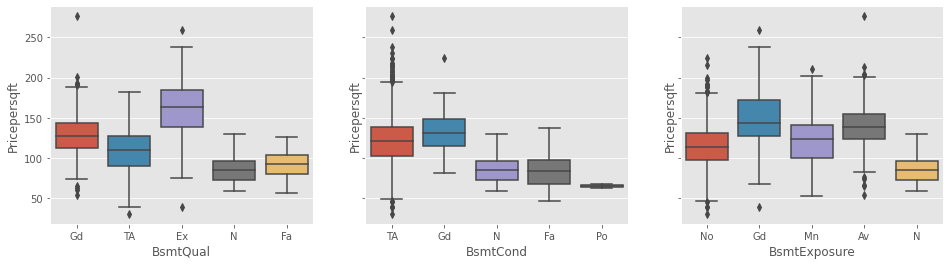

In [75]:
# Basement variables
fig, ax = plt.subplots(figsize=(16, 4), ncols=3, sharex=False, sharey=True)
sns.boxplot(data=housing, x='BsmtQual', y='Pricepersqft', ax=ax[0])
sns.boxplot(data=housing, x='BsmtCond', y='Pricepersqft', ax=ax[1])
sns.boxplot(data=housing, x='BsmtExposure', y='Pricepersqft', ax=ax[2])

In [76]:
# Consolidate basement quality into 3 catgories
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Fa':
        return 'N'
    if val == 'Gd':
        return 'TA'
    else: return val
housing['BsmtQual'] = housing['BsmtQual'].apply(categorize)
housing['BsmtQual'].value_counts()

TA    1248
Ex     117
N       71
Name: BsmtQual, dtype: int64

In [77]:
def run_mlr(varlis):
    """
    Function to run all combinations of linear regressions of given list of variables varlis
    """
    for var in varlis:
        target = housing.Pricepersqft
        if housing[var].dtype == 'object':
            x = pd.get_dummies(housing[var], columns=var, prefix=var, drop_first=True)
        else: x = housing[var]
        model = sm.OLS(target, x)
        results = model.fit()
        print(results.summary())
    x = pd.get_dummies(housing[varlis], columns=varlis, prefix=varlis, drop_first=True)
    model = sm.OLS(target, x)
    results = model.fit()
    print(results.summary())

In [78]:
var = ['BsmtUnfSF', 'TotalBsmtSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure']
run_mlr(var)

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.586
Model:                            OLS   Adj. R-squared (uncentered):              0.586
Method:                 Least Squares   F-statistic:                              2030.
Date:                Sat, 06 Feb 2021   Prob (F-statistic):                   5.53e-277
Time:                        18:42:45   Log-Likelihood:                         -8331.6
No. Observations:                1436   AIC:                                  1.667e+04
Df Residuals:                    1435   BIC:                                  1.667e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

                            OLS Regression Results                            
Dep. Variable:           Pricepersqft   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     2.472
Date:                Sat, 06 Feb 2021   Prob (F-statistic):           1.01e-15
Time:                        18:42:47   Log-Likelihood:                -5070.0
No. Observations:                1436   AIC:                         1.256e+04
Df Residuals:                     227   BIC:                         1.893e+04
Df Model:                        1208                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
BsmtUnfSF_14        67.7822     16.405  

In [79]:
basevar = ['BsmtCond', 'BsmtExposure']
housing.drop(basevar, axis=1, inplace=True)

In [80]:
# BsmtCond and BsmtExposure sound like important variables but what really matters is size, quality and 
# how much is still unfinished.

In [81]:
#Explore Garage features
grgvar = ['GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive']
housing[grgvar]

,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive
0,Attchd,RFn,2,548,TA,TA,Y
1,Attchd,RFn,2,460,TA,TA,Y
2,Attchd,RFn,2,608,TA,TA,Y
3,Detchd,Unf,3,642,TA,TA,Y
4,Attchd,RFn,3,836,TA,TA,Y
...,...,...,...,...,...,...,...
1455,Attchd,RFn,2,460,TA,TA,Y
1456,Attchd,Unf,2,500,TA,TA,Y
1457,Attchd,RFn,1,252,TA,TA,Y
1458,Attchd,Unf,1,240,TA,TA,Y


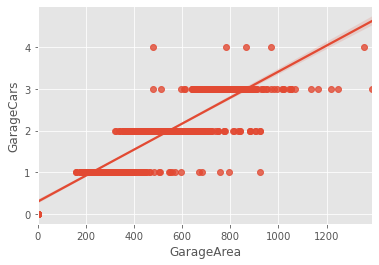

In [82]:
sns.regplot(data=housing, x='GarageArea', y='GarageCars')

In [83]:
# Drop GarageArea because information contained in GarageCars. People measure garages in number of cars more than area.
housing.drop('GarageArea', axis=1, inplace=True)

In [84]:
grgvar = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive']
for var in grgvar:
    print(housing[var].value_counts())

Attchd     854
Detchd     385
BuiltIn     85
N           79
Basment     18
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Unf    600
RFn    415
Fin    342
N       79
Name: GarageFinish, dtype: int64
TA    1289
N       79
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
TA    1304
N       79
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
Y    1320
N      86
P      30
Name: PavedDrive, dtype: int64


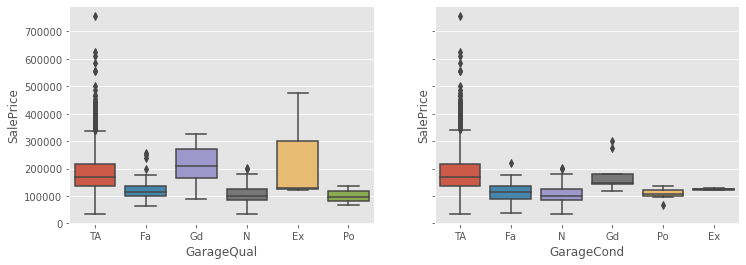

In [85]:
fig, ax = plt.subplots(figsize=(12, 4), ncols=2, sharex=False, sharey=True)
sns.boxplot(data=housing, x='GarageQual', y='SalePrice', ax=ax[0])
sns.boxplot(data=housing, x='GarageCond', y='SalePrice', ax=ax[1])

In [86]:
# Consolidate GarageCond into 3 catgories
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Fa':
        return 'N'
    if val == 'Po':
        return 'N'
    if val == 'Ex':
        return 'Gd'
    else: return val
housing['GarageCond'] = housing['GarageCond'].apply(categorize)
housing['GarageCond'].value_counts()

TA    1304
N      121
Gd      11
Name: GarageCond, dtype: int64

In [87]:
# Consolidate garage quality into 3 catgories
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Fa':
        return 'N'
    if val == 'Po':
        return 'N'
    if val == 'Ex':
        return 'Gd'
    else: return val
housing['GarageQual'] = housing['GarageQual'].apply(categorize)
housing['GarageQual'].value_counts()

TA    1289
N      130
Gd      17
Name: GarageQual, dtype: int64

In [88]:
var = ['GarageQual', 'GarageCond']
run_mlr(var)

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.930
Method:                 Least Squares   F-statistic:                              9559.
Date:                Sat, 06 Feb 2021   Prob (F-statistic):                        0.00
Time:                        18:42:48   Log-Likelihood:                         -7052.9
No. Observations:                1436   AIC:                                  1.411e+04
Df Residuals:                    1434   BIC:                                  1.412e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [89]:
# Both are good predictors at 94% and including both creates multicollinearity for no increase in explain.
# Drop Garage quality, because some will be captured in Overall quality and current condition is probably what matters.
housing.drop('GarageQual', axis=1, inplace=True)

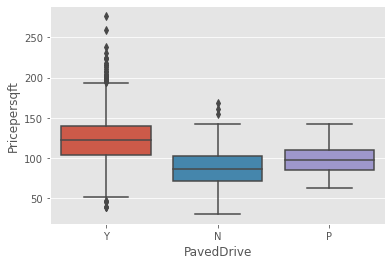

In [90]:
# Check difference between partial or no paved driveways
sns.boxplot(data=housing, x='PavedDrive', y='Pricepersqft')

In [91]:
var = ['PavedDrive']
x = pd.get_dummies(housing[var], columns=var, prefix=var, drop_first=True)
target = housing.Pricepersqft
model = sm.OLS(target, x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.911
Method:                 Least Squares   F-statistic:                              7370.
Date:                Sat, 06 Feb 2021   Prob (F-statistic):                        0.00
Time:                        18:42:48   Log-Likelihood:                         -7224.8
No. Observations:                1436   AIC:                                  1.445e+04
Df Residuals:                    1434   BIC:                                  1.446e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [92]:
bedvar = ['1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath']
housing[bedvar]

,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath
0,856,854,1710,2,1
1,1262,0,1262,2,0
2,920,866,1786,2,1
3,961,756,1717,1,0
4,1145,1053,2198,2,1
...,...,...,...,...,...
1455,953,694,1647,2,1
1456,2073,0,2073,2,0
1457,1188,1152,2340,2,0
1458,1078,0,1078,1,0


In [93]:
# Drop 1stFlrSF since info already contained in GrLivingArea 
housing.drop('1stFlrSF', axis=1, inplace=True)

In [94]:
# Total rooms above grade does not include bathrooms but includes basement bedrooms and other living rooms
# Create a new variable as difference between TotRmsAbvGrd less BedroomAbvGr less KitchenAbvGr
housing['OtherRmsAbvGrd'] = housing['TotRmsAbvGrd'] - housing['BedroomAbvGr']
# Check no negative rooms!
housing[housing['OtherRmsAbvGrd'] < 0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Pricepersqft,Shed,OtherRmsAbvGrd


In [95]:
var = ['OtherRmsAbvGrd', 'BedroomAbvGr', 'KitchenAbvGr', 'FullBath', 'HalfBath']
x = housing[var]
run_mlr(var)

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.843
Model:                            OLS   Adj. R-squared (uncentered):              0.843
Method:                 Least Squares   F-statistic:                              7712.
Date:                Sat, 06 Feb 2021   Prob (F-statistic):                        0.00
Time:                        18:42:48   Log-Likelihood:                         -7634.6
No. Observations:                1436   AIC:                                  1.527e+04
Df Residuals:                    1435   BIC:                                  1.528e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [96]:
# All room variables are statistically significant except Halfbath
housing.drop('TotRmsAbvGrd', axis=1, inplace=True)

In [97]:
# Fireplace, heating, electrical, central air
var = ['Fireplaces', 'FireplaceQu', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical']
housing[var]
run_mlr(var)

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.480
Model:                            OLS   Adj. R-squared (uncentered):              0.479
Method:                 Least Squares   F-statistic:                              1322.
Date:                Sat, 06 Feb 2021   Prob (F-statistic):                   9.59e-206
Time:                        18:42:48   Log-Likelihood:                         -8495.6
No. Observations:                1436   AIC:                                  1.699e+04
Df Residuals:                    1435   BIC:                                  1.700e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [98]:
var = ['FireplaceQu', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical']
for v in var:
       print(housing[v].value_counts())

N     686
Gd    370
TA    305
Fa     32
Ex     23
Po     20
Name: FireplaceQu, dtype: int64
GasA     1406
GasW       17
Grav        6
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
Ex    730
TA    422
Gd    236
Fa     47
Po      1
Name: HeatingQC, dtype: int64
Y    1343
N      93
Name: CentralAir, dtype: int64
SBrkr    1311
FuseA      93
FuseF      27
FuseP       3
Mix         2
Name: Electrical, dtype: int64


In [99]:
# Heating, CentralAir and Electrical will be too sparse after dummification and removing the category with largest values
# Drop those variables
var = ['Heating', 'CentralAir', 'Electrical']
housing.drop(var, axis=1, inplace=True)

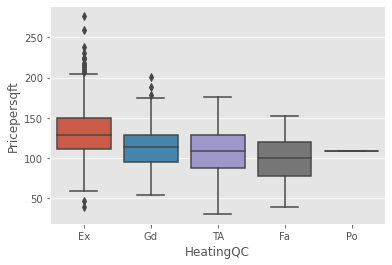

In [100]:
# Heating poor is not statistically significant
sns.boxplot(data=housing, x='HeatingQC', y='Pricepersqft')

In [101]:
# Consolidate HeatingQC Fair and Poor into Avg/Typical
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Po':
        return 'TA'
    if val == 'Fa':
        return 'TA'
    else: return val
housing['HeatingQC'] = housing['HeatingQC'].apply(categorize)
housing['HeatingQC'].value_counts()

Ex    730
TA    470
Gd    236
Name: HeatingQC, dtype: int64

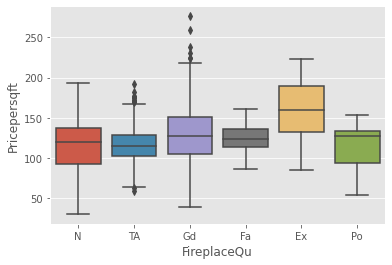

In [102]:
# Electrical appears to not be statistically significant feature
sns.boxplot(data=housing, x='FireplaceQu', y='Pricepersqft')

In [104]:
# Simplify FireplaceQu to consolidate N, TA, Fa and Po
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Po':
        return 'N'
    if val == 'TA':
        return 'N'
    if val == 'Fa':
        return 'N'
    else: return val
housing['FireplaceQu'] = housing['FireplaceQu'].apply(categorize)
housing['FireplaceQu'].value_counts()

N     1043
Gd     370
Ex      23
Name: FireplaceQu, dtype: int64

In [105]:
# Look at Yearbuilt, Year remodel added, YearGaragebuilt
# Fireplace, heating, electrical, central air
var = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
run_mlr(var)


                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                          2.311e+04
Date:                Sat, 06 Feb 2021   Prob (F-statistic):                        0.00
Time:                        18:42:49   Log-Likelihood:                         -6925.8
No. Observations:                1436   AIC:                                  1.385e+04
Df Residuals:                    1435   BIC:                                  1.386e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

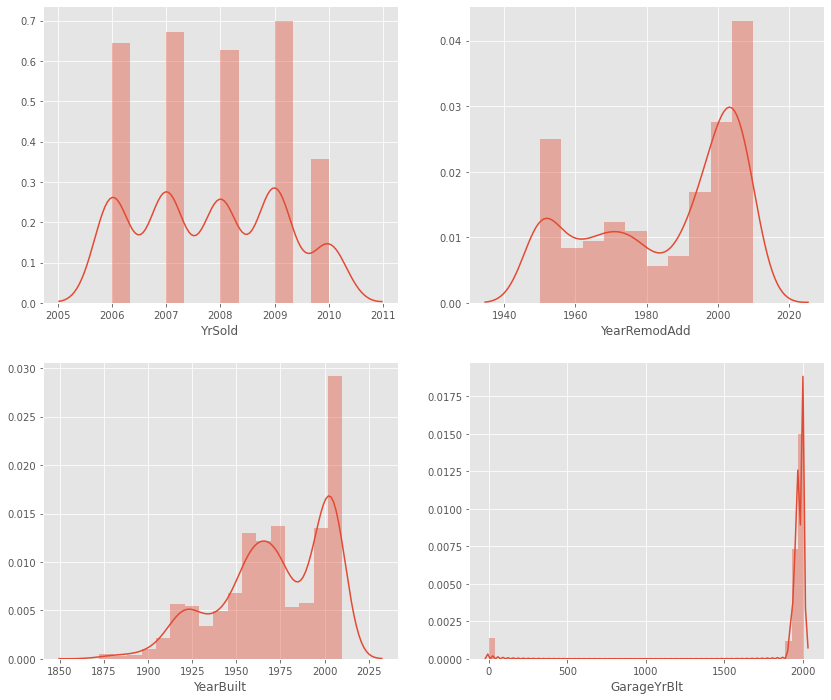

In [106]:
fig, ax = plt.subplots(figsize=(14, 12), ncols=2, nrows=2, sharex=False, sharey=False)
sns.distplot(housing['YrSold'], ax=ax[0,0])
sns.distplot(housing['YearBuilt'], ax=ax[1,0])
sns.distplot(housing['YearRemodAdd'], ax=ax[0,1])
sns.distplot(housing['GarageYrBlt'], ax=ax[1,1])

In [107]:
# GarageYrBlt zeros are creating a problem, if zero then impute them to be the Yearbuilt
housing.loc[housing['GarageYrBlt'] == 0, 'GarageYrBlt'] = housing.loc[housing['GarageYrBlt'] == 0, 'YearBuilt']

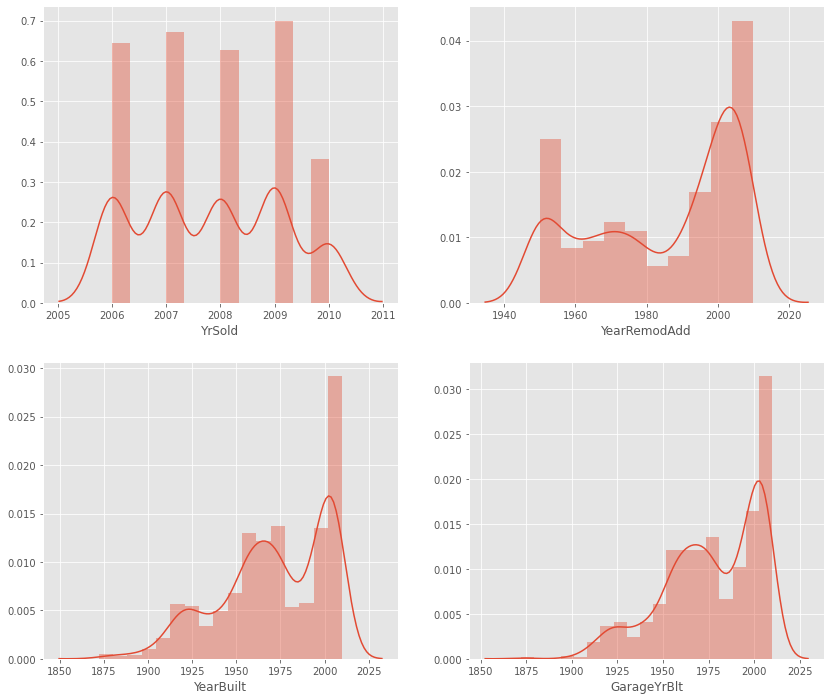

In [108]:
fig, ax = plt.subplots(figsize=(14, 12), ncols=2, nrows=2, sharex=False, sharey=False)
sns.distplot(housing['YrSold'], ax=ax[0,0])
sns.distplot(housing['YearBuilt'], ax=ax[1,0])
sns.distplot(housing['YearRemodAdd'], ax=ax[0,1])
sns.distplot(housing['GarageYrBlt'], ax=ax[1,1])

In [109]:
# Convert year variables into age for benefits of standardisation and interpretability
housing['HouseAge'] = housing['YrSold'] - housing['YearBuilt']
housing['RemodAge'] = housing['YrSold'] - housing['YearRemodAdd']
housing['GarageAge'] = housing['YrSold'] - housing['GarageYrBlt']

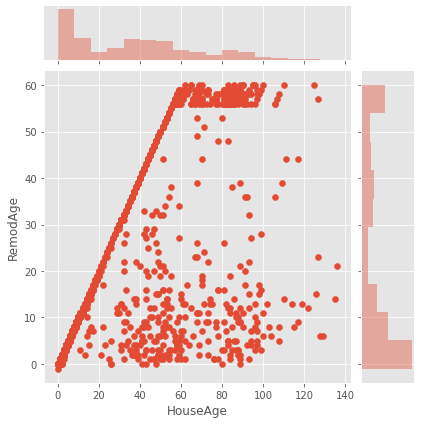

In [110]:
# Check joinplots
sns.jointplot(housing['HouseAge'], housing['RemodAge'])

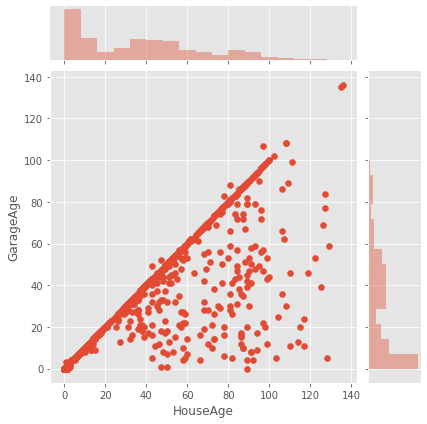

In [111]:
# Check joinplots
sns.jointplot(housing['HouseAge'], housing['GarageAge'])

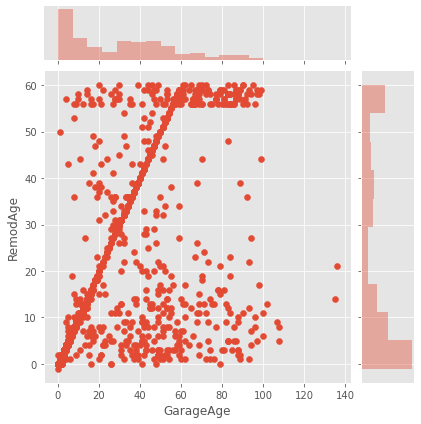

In [112]:
# Check joinplots
sns.jointplot(housing['GarageAge'], housing['RemodAge'])

In [113]:
# Drop original 4 year variables
var = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [114]:
# Drop GarageAge since Remodel captures this and more
housing.drop('GarageAge', axis=1, inplace=True)

In [115]:
# Year built gives the information we need, the other variables do not add anything.
var = ['YearRemodAdd', 'GarageYrBlt']
housing.drop(var, axis=1, inplace=True)

In [116]:
# Explore if when and how sale was made makes a difference
var = ['MoSold', 'SaleType', 'SaleCondition']
housing['SaleCondition'].dtype

dtype('O')

In [117]:
var = ['MoSold', 'SaleType', 'SaleCondition']
run_mlr(var)

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.900
Model:                            OLS   Adj. R-squared (uncentered):              0.899
Method:                 Least Squares   F-statistic:                              1161.
Date:                Sat, 06 Feb 2021   Prob (F-statistic):                        0.00
Time:                        18:42:52   Log-Likelihood:                         -7313.7
No. Observations:                1436   AIC:                                  1.465e+04
Df Residuals:                    1425   BIC:                                  1.471e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

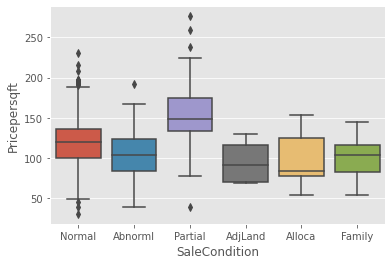

In [118]:
# SaleCondition doesn't appears statistically significant
sns.boxplot(data=housing, x='SaleCondition', y='Pricepersqft')

In [119]:
# Consolidate SaleCondition for low volume catgories
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Family':
        return 'Other'
    if val == 'Alloca':
        return 'Other'
    if val == 'AdjLand':
        return 'Other'
    else: return val
housing['SaleCondition'] = housing['SaleCondition'].apply(categorize)
housing['SaleCondition'].value_counts()

Normal     1179
Partial     123
Abnorml      99
Other        35
Name: SaleCondition, dtype: int64

In [120]:
housing['SaleType'].value_counts()

WD       1245
New       120
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [121]:
# Consolidate SaleType into 3  categories
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'COD':
        return 'Other'
    if val == 'ConLD':
        return 'Other'
    if val == 'ConLI':
        return 'Other'
    if val == 'ConLw':
        return 'Other'
    if val == 'CWD':
        return 'Other'
    if val == 'Oth':
        return 'Other'
    if val == 'Con':
        return 'Other'
    else: return val
housing['SaleType'] = housing['SaleType'].apply(categorize)
housing['SaleType'].value_counts()

WD       1245
New       120
Other      71
Name: SaleType, dtype: int64

In [122]:
# Aggregating prices to identify monthly seasonality
colFun = {'Pricepersqft':['count', 'mean']}
analysis=housing.groupby('MoSold').agg(colFun)
analysis

Pricepersqft            
              count        mean
MoSold                         
1                57  121.928451
10               89  122.696756
11               76  117.810835
12               58  124.125260
2                52  124.353683
3               103  120.474306
4               140  118.352076
5               204  121.590740
6               246  119.063007
7               230  120.456217
8               120  120.140595
9                61  120.276542

In [123]:
# Consolidate Months into seasons
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val in ['12','1','2']:
        return 'Winter'
    if val in ['3','4','5']:
        return 'Spring'
    if val in ['6','7','8']:
        return 'Summer'
    if val in ['9','10','11']:
        return 'Fall'
housing['MoSold'] = housing['MoSold'].apply(categorize)
housing['MoSold'].value_counts()

Summer    596
Spring    447
Fall      226
Winter    167
Name: MoSold, dtype: int64

In [124]:
# Aggregating prices to identify monthly seasonality
colFun = {'Pricepersqft':['count', 'mean']}
analysis=housing.groupby('MoSold').agg(colFun)
analysis

Pricepersqft            
              count        mean
MoSold                         
Fall            226  120.400459
Spring          447  120.319139
Summer          596  119.817619
Winter          167  123.446576

In [125]:
# Variables associated with external features of house
var = ['Fence', 'Functional', 'Foundation', 'ExterCond', 'ExterQual', 'Exterior2nd', 'Exterior1st', 'RoofMatl', 'RoofStyle']
run_mlr(var)

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.904
Model:                            OLS   Adj. R-squared (uncentered):              0.904
Method:                 Least Squares   F-statistic:                              3378.
Date:                Sat, 06 Feb 2021   Prob (F-statistic):                        0.00
Time:                        18:42:52   Log-Likelihood:                         -7280.7
No. Observations:                1436   AIC:                                  1.457e+04
Df Residuals:                    1432   BIC:                                  1.459e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [126]:
# Simplify Functional to 4 categories
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Sev':
        return 'Maj'
    elif val == 'Maj1':
        return 'Maj'
    elif val == 'Maj2':
        return 'Maj'
    elif val == 'Min1':
        return 'Min'
    elif val == 'Min2':
        return 'Min'
    elif val == 'Mod':
        return 'Mod'
    elif val == 'Typ':
        return 'Typ'
    else: return val
housing['Functional'] = housing['Functional'].apply(categorize)
housing['Functional'].value_counts()

Typ    1340
Min      63
Maj      20
Mod      13
Name: Functional, dtype: int64

In [127]:
# Lots of variables that don't really have explanatory power and also those that contribute to multi-collinearity
var = ['Fence', 'Foundation', 'Exterior2nd', 'Exterior1st', 'RoofMatl', 'RoofStyle']
housing.drop(var, axis=1, inplace=True)

In [128]:
# Variables associated with external features of house
var = ['Functional', 'ExterCond', 'ExterQual', 'MasVnrType', 'MasVnrArea']
for v in var:
    print(housing[v].value_counts())

Typ    1340
Min      63
Maj      20
Mod      13
Name: Functional, dtype: int64
TA    1261
Gd     144
Fa      27
Ex       3
Po       1
Name: ExterCond, dtype: int64
TA    895
Gd    478
Ex     50
Fa     13
Name: ExterQual, dtype: int64
None       854
BrkFace    442
Stone      126
BrkCmn      14
Name: MasVnrType, dtype: int64
0.0      852
72.0       8
108.0      8
180.0      8
16.0       7
        ... 
415.0      1
293.0      1
259.0      1
562.0      1
621.0      1
Name: MasVnrArea, Length: 324, dtype: int64


In [129]:
# Consolidate ExterCond to 3 categories
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Po':
        return 'Fa'
    elif val == 'Ex':
        return 'Gd'
    else: return val
housing['ExterCond'] = housing['ExterCond'].apply(categorize)
housing['ExterCond'].value_counts()

TA    1261
Gd     147
Fa      28
Name: ExterCond, dtype: int64

In [130]:
# Consolidate ExterQual to 3 categories
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Fa':
        return 'TA'
    else: return val
housing['ExterQual'] = housing['ExterQual'].apply(categorize)
housing['ExterQual'].value_counts()

TA    908
Gd    478
Ex     50
Name: ExterQual, dtype: int64

In [131]:
# Variables associated with Masonry veneer
var = ['MasVnrType', 'MasVnrArea']

var = ['MasVnrArea']
x = housing[var]
model = sm.OLS(target, x)
results = model.fit()
print(results.summary())

var = ['MasVnrType']
x = pd.get_dummies(housing[var], columns=var, prefix=var, drop_first=True)
model = sm.OLS(target, x)
results = model.fit()
print(results.summary())

x['MasVnrArea'] = housing['MasVnrArea']
model = sm.OLS(target, x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.280
Model:                            OLS   Adj. R-squared (uncentered):              0.279
Method:                 Least Squares   F-statistic:                              556.7
Date:                Sat, 06 Feb 2021   Prob (F-statistic):                   2.82e-104
Time:                        18:42:52   Log-Likelihood:                         -8729.2
No. Observations:                1436   AIC:                                  1.746e+04
Df Residuals:                    1435   BIC:                                  1.747e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [132]:
# Drop MasVnrArea since quality has more explanatory power
housing.drop('MasVnrArea', axis=1, inplace=True)

In [133]:
# Variables associated with Overall
var = ['OverallQual', 'OverallCond']
run_mlr(var)

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                          2.365e+04
Date:                Sat, 06 Feb 2021   Prob (F-statistic):                        0.00
Time:                        18:42:52   Log-Likelihood:                         -6910.3
No. Observations:                1436   AIC:                                  1.382e+04
Df Residuals:                    1435   BIC:                                  1.383e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [134]:
# Overall condition and quality both significant so keep both

In [135]:
# Variables relating to land and outside
var = ['LandSlope', 'Utilities', 'LotShape', 'Condition2', 'LotConfig', 'LandContour', 'Alley']
run_mlr(var)

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                          2.365e+04
Date:                Sat, 06 Feb 2021   Prob (F-statistic):                        0.00
Time:                        18:42:52   Log-Likelihood:                         -6910.3
No. Observations:                1436   AIC:                                  1.382e+04
Df Residuals:                    1435   BIC:                                  1.383e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [136]:
# Drop Landslope, Utilities and Lotshape since no explanatory power
var = ['LandSlope', 'Utilities', 'LotShape']
housing.drop(var, axis=1, inplace=True)

In [137]:
var = ['Condition2', 'LotConfig', 'LandContour', 'Alley']
for v in var:
    print(housing[v].value_counts())

Norm      1422
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
Name: Condition2, dtype: int64
Inside     1041
Corner      256
CulDSac      88
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Lvl    1302
Bnk      59
HLS      46
Low      29
Name: LandContour, dtype: int64
N       1346
Grvl      49
Pave      41
Name: Alley, dtype: int64


In [138]:
#These variables have low explanatory power and likely to just contribute to multi-collinearity
var = ['Condition2', 'Alley', 'LandContour', 'LotConfig']
housing.drop(var, axis=1, inplace=True)

In [139]:
housing['Condition1'].value_counts()

Norm      1243
Feedr       77
Artery      47
RRAn        25
PosN        19
RRAe        11
PosA         7
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [140]:
# Consolidate Condition1 for railroad variables and positive feature variables
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'RRAn':
        return 'RR'
    if val == 'RRNn':
        return 'RR'
    if val == 'RRNe':
        return 'RR'
    if val == 'RRAe':
        return 'RR'
    if val == 'PosN':
        return 'Pos'
    if val == 'PosA':
        return 'Pos'
    else: return val
housing['Condition1'] = housing['Condition1'].apply(categorize)
housing['Condition1'].value_counts()

Norm      1243
Feedr       77
Artery      47
RR          43
Pos         26
Name: Condition1, dtype: int64

In [141]:
# Issues with HouseStyle categories, perhaps consider consolidating them
housing.HouseStyle.value_counts()

1Story    715
2Story    436
1.5Fin    150
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

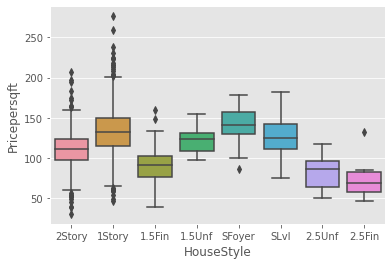

In [142]:
sns.boxplot(data=housing,x='HouseStyle',y='Pricepersqft')
# So much variablity in 1 and 2 story so consilidate with 1.5 and 2.5 stories

In [143]:
# Overall value and quality will take into account if a house is unfinished etc. This feature is combining infomation
# like if a house is finished or unfinished.
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == '1.5Fin':
        return '1.5Story'
    elif val == '1.5Unf':
        return '1.5Story'
    elif val == '2.5Unf':
        return '2.5Story'
    elif val == '2.5Fin':
        return '2.5Story'
    elif val == 'SLvl':
        return 'Other'
    elif val == 'SFoyer':
        return 'Other'
    else: return val
housing['HouseStyle'] = housing['HouseStyle'].apply(categorize)
housing['HouseStyle'].value_counts()

1Story      715
2Story      436
1.5Story    164
Other       102
2.5Story     19
Name: HouseStyle, dtype: int64

In [144]:
#Explore neighbourhood and zoning
var = ['HouseStyle', 'BldgType', 'MSSubClass', 'MSZoning', 'Neighborhood']
run_mlr(var)

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.886
Method:                 Least Squares   F-statistic:                              2801.
Date:                Sat, 06 Feb 2021   Prob (F-statistic):                        0.00
Time:                        18:42:53   Log-Likelihood:                         -7401.1
No. Observations:                1436   AIC:                                  1.481e+04
Df Residuals:                    1432   BIC:                                  1.483e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [145]:
# Building type is explained by MSSubClass and house style so drop it
# MSZoning is explained by all the other variables, like neighbourhood, house-type, size etc
# Housestyle is explained by MSSubCLass so drop it
var = ['BldgType','MSZoning', 'HouseStyle']
housing.drop(var, axis=1, inplace=True)

In [146]:
housing.MSSubClass.value_counts()

20     527
60     292
50     142
120     87
30      68
160     63
70      60
80      58
90      51
190     28
85      20
75      15
45      12
180     10
40       3
Name: MSSubClass, dtype: int64

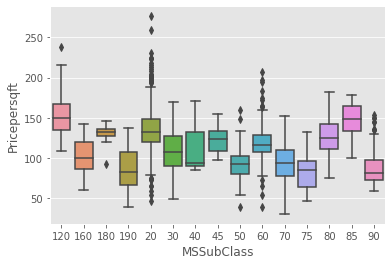

In [147]:
sns.boxplot(data=housing, x='MSSubClass', y='Pricepersqft')

In [148]:
# MSSubClass convert from ordinal categorical to nominal categorical
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == '20':
        return 'A1'
    elif val == '30':
        return 'A2'
    elif val == '40':
        return 'A3'
    elif val == '120':
        return 'A4'
    elif val == '45':
        return 'B1'
    elif val == '50':
        return 'B2'
    elif val == '150':
        return 'B3'
    elif val == '60':
        return 'C1'
    elif val == '70':
        return 'C2'
    elif val == '160':
        return 'C3'
    elif val == '75':
        return 'D1'
    elif val == '80':
        return 'E1'
    elif val == '85':
        return 'E2'
    elif val == '180':
        return 'E3'
    elif val == '90':
        return 'F1'
    elif val == '190':
        return 'F2'
    else: return val
housing['MSSubClass'] = housing['MSSubClass'].apply(categorize)
housing['MSSubClass'].value_counts()

A1    527
C1    292
B2    142
A4     87
A2     68
C3     63
C2     60
E1     58
F1     51
F2     28
E2     20
D1     15
B1     12
E3     10
A3      3
Name: MSSubClass, dtype: int64

In [149]:
# Bathroom consolidation (weight according to perceived importance)
housing['AllBath'] = 2*housing['FullBath'] + 1.5*housing['HalfBath'] + 1*housing['BsmtFullBath'] + 0.5*housing['BsmtHalfBath']
var = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'AllBath']
run_mlr(var)

x = housing[var]
model = sm.OLS(target, x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.461
Model:                            OLS   Adj. R-squared (uncentered):              0.460
Method:                 Least Squares   F-statistic:                              1226.
Date:                Sat, 06 Feb 2021   Prob (F-statistic):                   1.15e-194
Time:                        18:42:53   Log-Likelihood:                         -8521.1
No. Observations:                1436   AIC:                                  1.704e+04
Df Residuals:                    1435   BIC:                                  1.705e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [150]:
# Drop other housing variables and consolidate into 1 bathroom variable
var = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']
housing.drop(var, axis=1, inplace=True)

In [151]:
# Check scores after feature engineering, pretty similar to before so have not lost any information
run_lasso(housing)

The best score is 0.8006
The training error is 0.1599
The testing error is 0.2683


# Done with feature assessment, ready to use one-hot encoding and modelling

## One-hot encoding of categorical variables
1. Before one-hot encoding, scale the numerical variables because we will apply PCA
2. Use one-hot encoding to convert categorical features into numerical variables dropping one category to prevent multicollinearity
3. 41 features will explode to about 158, which is still manageable
4. Data will be ready for PCA thereafter

In [152]:
# Pick up from here
# Variables with missing values ranked by percentage missing
summarydf = summarise_data(housing, 'Pricepersqft')
summarydf

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,PearsonCorr,NumOutliers
0,Id,1436,0,1436,0.0,numerical,0,-0.000624,-0.013514,0
1,MSSubClass,1436,0,1436,0.0,categorical,15,0.000000,NaN,0
2,LotFrontage,1436,0,1436,0.0,numerical,0,0.144316,0.128241,77
3,LotArea,1436,0,1436,0.0,numerical,0,2.305335,0.096485,66
4,Neighborhood,1436,0,1436,0.0,categorical,25,0.000000,NaN,0
5,Condition1,1436,0,1436,0.0,categorical,5,0.000000,NaN,0
6,OverallQual,1436,0,1436,0.0,numerical,0,0.206628,0.480810,2
7,OverallCond,1436,0,1436,0.0,numerical,0,0.687756,0.030679,124
8,YearBuilt,1436,0,1436,0.0,numerical,0,-0.614650,0.561830,7
9,MasVnrType,1436,0,1436,0.0,categorical,4,0.000000,NaN,0


In [153]:
# Store lists of names of numerical and categorical features
mask = summarydf.VariableType == 'categorical'
categorical_vars = list(summarydf.loc[mask, 'Predictor'])
print('The number of categorical variables are: %.0i' %len(categorical_vars))
mask = summarydf.VariableType == 'numerical'
numerical_vars = list(summarydf.loc[mask, 'Predictor'])
print('The number of numerical variables are: %.0i' %len(numerical_vars))

The number of categorical variables are: 22
The number of numerical variables are: 22


In [154]:
# Drop Id and SalePrice, GrLivingArea and Pricepersqft to only leave features/response/independent variables
target = housing.Pricepersqft
numerical_vars.remove('SalePrice')
numerical_vars.remove('Pricepersqft')
numerical_vars.remove('Id')
numerical_vars.remove('GrLivArea')
features = housing.drop(['Id', 'SalePrice', 'Pricepersqft', 'GrLivArea'], axis=1)
features[numerical_vars]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,OpenPorchSF,YrSold,OtherRmsAbvGrd,HouseAge,RemodAge,AllBath
0,65.0,8450,7,5,2003,150,856,854,3,1,0,2,61,2008,5,5,5,6.5
1,80.0,9600,6,8,1976,284,1262,0,3,1,1,2,0,2007,3,31,31,4.5
2,68.0,11250,7,5,2001,434,920,866,3,1,1,2,42,2008,3,7,6,6.5
3,60.0,9550,7,5,1915,540,756,756,3,1,1,3,35,2006,4,91,36,3.0
4,84.0,14260,8,5,2000,490,1145,1053,4,1,1,3,84,2008,5,8,8,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,1999,953,953,694,3,1,1,2,40,2007,4,8,7,5.5
1456,85.0,13175,6,6,1978,589,1542,0,3,1,2,2,0,2010,4,32,22,5.0
1457,66.0,9042,7,9,1941,877,1152,1152,4,1,2,1,60,2010,5,69,4,4.0
1458,68.0,9717,5,6,1950,0,1078,0,2,1,0,1,0,2010,3,60,14,3.0


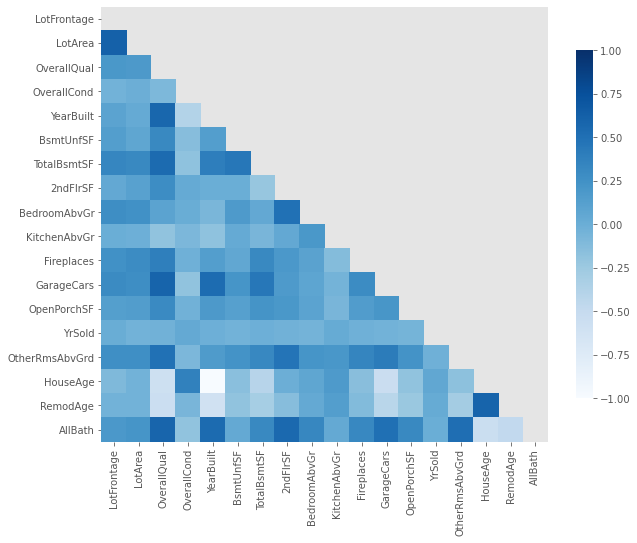

In [155]:
# Check correlation matrix again
# Correlation plot of all variables
corr_plot(features, list(features.columns))

In [156]:
# Scale all numerical features by subtracting mean and dividing by std. deviation
scaler = StandardScaler()
features[numerical_vars] = scaler.fit_transform(features[numerical_vars])
features[numerical_vars]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,OpenPorchSF,YrSold,OtherRmsAbvGrd,HouseAge,RemodAge,AllBath
0,-0.244283,-0.302070,0.662126,-0.518170,1.048114,-0.948892,-0.468232,1.186041,0.169203,-0.209724,-0.946967,0.316488,0.221545,0.137052,1.131017,-1.040515,-0.870545,1.622320
1,0.497702,-0.047606,-0.065351,2.174564,0.156531,-0.646544,0.509910,-0.795772,0.169203,-0.209724,0.628751,0.316488,-0.702045,-0.616995,-0.522894,-0.183269,0.389395,0.246474
2,-0.095886,0.317495,0.662126,-0.518170,0.982071,-0.308095,-0.314042,1.213889,0.169203,-0.209724,0.628751,0.316488,-0.066130,0.137052,-0.522894,-0.974573,-0.822086,1.622320
3,-0.491611,-0.058670,0.662126,-0.518170,-1.857787,-0.068925,-0.709154,0.958620,0.169203,-0.209724,0.628751,1.657126,-0.172116,-1.371042,0.304062,1.794991,0.631691,-0.785411
4,0.695564,0.983527,1.389603,-0.518170,0.949049,-0.181741,0.228032,1.647845,1.402584,-0.209724,0.628751,1.657126,0.569784,0.137052,1.131017,-0.941602,-0.725167,1.622320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.392680,-0.420009,-0.065351,-0.518170,0.916028,0.862938,-0.234538,0.814741,0.169203,-0.209724,0.628751,0.316488,-0.096412,-0.616995,0.304062,-0.941602,-0.773627,0.934397
1456,0.745030,0.743446,-0.065351,0.379408,0.222574,0.041635,1.184491,-0.795772,0.169203,-0.209724,2.204470,0.316488,-0.702045,1.645145,0.304062,-0.150298,-0.046738,0.590436
1457,-0.194818,-0.171076,0.662126,3.072142,-0.999225,0.691457,0.244896,1.877587,1.402584,-0.209724,2.204470,-1.024150,0.206405,1.645145,1.131017,1.069629,-0.919004,-0.097488
1458,-0.095886,-0.021717,-0.792829,0.379408,-0.702031,-1.287341,0.066614,-0.795772,-1.064177,-0.209724,-0.946967,-1.024150,-0.702045,1.645145,-0.522894,0.772890,-0.434412,-0.785411


In [157]:
onehothousing = pd.get_dummies(features, columns=categorical_vars, prefix=categorical_vars, drop_first=True)
onehothousing

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,...,ScreenPorch_N,MoSold_Spring,MoSold_Summer,MoSold_Winter,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial,Shed_Y
0,-0.244283,-0.302070,0.662126,-0.518170,1.048114,-0.948892,-0.468232,1.186041,0.169203,-0.209724,...,1,0,0,1,0,1,1,0,0,0
1,0.497702,-0.047606,-0.065351,2.174564,0.156531,-0.646544,0.509910,-0.795772,0.169203,-0.209724,...,1,1,0,0,0,1,1,0,0,0
2,-0.095886,0.317495,0.662126,-0.518170,0.982071,-0.308095,-0.314042,1.213889,0.169203,-0.209724,...,1,0,0,0,0,1,1,0,0,0
3,-0.491611,-0.058670,0.662126,-0.518170,-1.857787,-0.068925,-0.709154,0.958620,0.169203,-0.209724,...,1,0,0,1,0,1,0,0,0,0
4,0.695564,0.983527,1.389603,-0.518170,0.949049,-0.181741,0.228032,1.647845,1.402584,-0.209724,...,1,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.392680,-0.420009,-0.065351,-0.518170,0.916028,0.862938,-0.234538,0.814741,0.169203,-0.209724,...,1,0,1,0,0,1,1,0,0,0
1456,0.745030,0.743446,-0.065351,0.379408,0.222574,0.041635,1.184491,-0.795772,0.169203,-0.209724,...,1,0,0,1,0,1,1,0,0,0
1457,-0.194818,-0.171076,0.662126,3.072142,-0.999225,0.691457,0.244896,1.877587,1.402584,-0.209724,...,1,1,0,0,0,1,1,0,0,1
1458,-0.095886,-0.021717,-0.792829,0.379408,-0.702031,-1.287341,0.066614,-0.795772,-1.064177,-0.209724,...,1,1,0,0,0,1,1,0,0,0


## Apply PCA on features to help understand components and potential R2
1. Now that we have no missing or catgorical data, we have exploded the dimensionality and hence sparsity of hyperspace to make  any meaningful predictions.
2. This is ripe to apply PCA to understand components

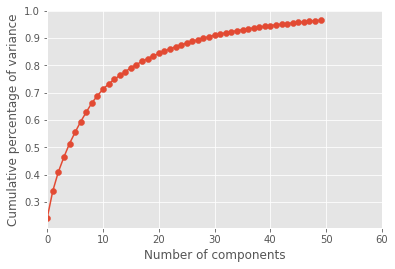

In [158]:
pca = PCA()
numcomp = 50
pca.set_params(n_components=numcomp)
pca.fit(onehothousing)
plt.scatter(range(numcomp), np.cumsum(pca.explained_variance_ratio_))
plt.plot(range(numcomp), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative percentage of variance')
plt.xlim(0, 60)
plt.show()

In [159]:
# The first 35 components explain >85% of the variance. There appears to be no clear evidence of an elbow
# to indicate a definitive number of components that explain most of the variance.

# Feature Selection
1. Use mutual_info_regression to identify important and non-important features
2. Pay close attention to categorical (discrete) features

In [160]:
features = housing.drop(['SalePrice', 'Id', 'Pricepersqft'], axis=1)
summarydf = summarise_data(features, 'LotArea')
mask = summarydf.VariableType == 'categorical'
categorical_vars = list(summarydf.loc[mask, 'Predictor'])
mask = summarydf.VariableType == 'numerical'
numerical_vars = list(summarydf.loc[mask, 'Predictor'])
onehothousing = pd.get_dummies(features, columns=categorical_vars, prefix=categorical_vars, drop_first=True)
newcatvars = onehothousing.drop(numerical_vars,axis=1).columns
discrete_indices = np.array([onehothousing.columns.get_loc(c) for c in newcatvars])
mutual_scores = mutual_info_regression(onehothousing, target, discrete_features=discrete_indices)
impvars = pd.Series(mutual_scores, index=onehothousing.iloc[:,:].columns).sort_values(ascending=False)
impvars.head(50)

YearBuilt                0.305067
HouseAge                 0.280653
RemodAge                 0.182481
TotalBsmtSF              0.175455
OverallQual              0.158193
2ndFlrSF                 0.155171
AllBath                  0.141690
LotFrontage              0.119201
GarageCars               0.113504
BedroomAbvGr             0.107808
ExterQual_TA             0.099634
BsmtUnfSF                0.093234
GarageType_Attchd        0.084695
OverallCond              0.084622
MSSubClass_B2            0.076315
KitchenQual_TA           0.075887
OpenPorchSF              0.075339
LotArea                  0.074838
GrLivArea                0.073207
OtherRmsAbvGrd           0.060421
KitchenQual_Gd           0.059475
SaleCondition_Partial    0.059453
ExterQual_Gd             0.058010
GarageFinish_Unf         0.057697
MasVnrType_Stone         0.057055
KitchenAbvGr             0.056855
Neighborhood_NridgHt     0.055059
BsmtQual_TA              0.052914
GarageType_Detchd        0.050211
MSSubClass_A4 

In [161]:
impvars[impvars==0]

YrSold                  0.0
Condition1_RR           0.0
Neighborhood_Crawfor    0.0
MoSold_Spring           0.0
MoSold_Summer           0.0
MoSold_Winter           0.0
MSSubClass_A3           0.0
Shed_Y                  0.0
dtype: float64

In [162]:
# Can drop these additional features since completely independent of target variable
droplis = ['YrSold', 'Shed', 'MoSold', 'SaleType', 'Exterior1st']
features.drop(droplis, axis=1, inplace=True)
summarydf = summarise_data(features, 'YearBuilt')
mask = summarydf.VariableType == 'categorical'
categorical_vars = list(summarydf.loc[mask, 'Predictor'])
mask = summarydf.VariableType == 'numerical'
numerical_vars = list(summarydf.loc[mask, 'Predictor'])
onehothousing = pd.get_dummies(features, columns=categorical_vars, prefix=categorical_vars, drop_first=True)
onehotcatvars = onehothousing.drop(numerical_vars,axis=1).columns
discrete_indices = np.array([onehothousing.columns.get_loc(c) for c in onehotcatvars])
mutual_scores = mutual_info_regression(onehothousing, target, discrete_features=discrete_indices)
impvars = pd.Series(mutual_scores, index=onehothousing.iloc[:,:].columns).sort_values(ascending=False)
impvars.head(50)

KeyError: "['Exterior1st'] not found in axis"

In [ ]:
impvars[impvars==0]

## Train-test split using 70/30
1. Keep 70% of data for training
2. Hold-out 30% for out-of-sample testing

In [ ]:
# Store lists of names of numerical and categorical features
X_train, X_test, y_train, y_test = train_test_split(onehothousing, target, test_size=0.3, random_state=28)

## Applying machine learning models
1. Use 5-fold cross-validation and grid-search to optimise across different models
2. Use default score which is fine for supervised learning regression models that predict continuous variable

In [ ]:
#from sklearn.metrics import mean_absolute_error
def get_error(X_train, y_train, X_test, y_test, model, show = True):
    """
    Simple function to print train and test errors for a given model with parameter to show results
    """
    model.fit(X_train, y_train)
    train_error = 1 - model.score(X_train, y_train)
    test_error  = 1 - model.score(X_test, y_test)
    #train_error = mean_absolute_error(y_train, model.predict(X_train))
    #test_error = mean_absolute_error(y_test, model.predict(X_test))
    if show:
        print("The training error is: %.5f" %train_error)
        print("The test     error is: %.5f" %test_error)
    return [train_error, test_error]

In [ ]:
# Linear Regression model
linear = LinearRegression()
linear.set_params(normalize=False)
linear.fit(X_train, y_train)
train_error, test_error = get_error(X_train, y_train, X_test, y_test, linear)

In [ ]:
# Ridge model
ridge = Ridge()
ridge.set_params(normalize=False)
ridge.set_params(alpha=0.1)
ridge.fit(X_train, y_train)
train_error, test_error = get_error(X_train, y_train, X_test, y_test, ridge)

In [ ]:
grid_para_ridge = {'alpha': np.arange(0,2,0.05)}
grid_search_ridge = ms.GridSearchCV(ridge, grid_para_ridge, cv=10, scoring='r2').fit(X_train, y_train)
print('The best score is %.4f' %grid_search_ridge.best_score_)
print('The training error is %.4f' %(1 - grid_search_ridge.best_estimator_.score(X_train, y_train)))
print('The testing error is %.4f' %(1 - grid_search_ridge.best_estimator_.score(X_test, y_test)))

In [ ]:
# Lasso model
lasso = Lasso()
lasso.set_params(normalize=False)
lasso.set_params(alpha=0.1)
lasso.fit(X_train, y_train)
train_error, test_error = get_error(X_train, y_train, X_test, y_test, lasso)

In [ ]:
grid_para_lasso = {'alpha': np.arange(0,2,0.05)}
grid_search_lasso = ms.GridSearchCV(lasso, grid_para_lasso, cv=10, scoring='r2').fit(X_train, y_train)
print('The best score is %.4f' %grid_search_lasso.best_score_)
print('The training error is %.4f' %(1 - grid_search_lasso.best_estimator_.score(X_train, y_train)))
print('The testing error is %.4f' %(1 - grid_search_lasso.best_estimator_.score(X_test, y_test)))

In [ ]:
linear = LinearRegression(normalize=False)
ridge = Ridge(normalize=False)
lasso = Lasso(normalize=False)

modelList = [linear, ridge, lasso]
modelSeries = pd.Series(modelList, index=['MLR', 'Ridge', 'Lasso'])

# fit all the models to the training data
modelSeries.apply(lambda t:t.fit(X_train, y_train))

ans = modelSeries.apply(lambda t:pd.Series(get_error(X_train, y_train, X_test, y_test, t, False)))
ans.columns = ['train score', 'test score']
ans

In [ ]:
lasso  = Lasso()
alphas = np.linspace(0.1,2.1,20)
lasso.set_params(normalize=False)
coefs_lasso  = []

for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(onehothousing, target)  
        coefs_lasso.append(lasso.coef_)

coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = onehothousing.columns)  
coefs_lasso.head()

##############################################################################################

for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.legend(loc=1)   

In [ ]:
# Code for jointplot of 2 variables
#sns.jointplot(df['num_critic_for_reviews'], df['imdb_score'])

In [ ]:
# Aggregating different stats for different variables
# colFun = {'country':['count'],
#           'population': ['sum','min', 'max','mean','std'], 
#           'area': ['sum','min', 'max','mean'],
#           'coastline':['sum','min', 'max'],
#           'birthrate':['min', 'max','mean','std'],
#           'deathrate':['min', 'max','mean','std'],
#           'life expectancy':['min', 'max','mean','std']}
# analysis=group.agg(colFun)
# analysis